### Program 2 of 3
### Purpose: This code performs factor analysis and feature selection
### Inputs: final weekly dataset
### Outputs: Selected Liquidity Risk Factors and Features 
### Developer: Rweyemamu Barongo rbarongo@gmail.com, ribarongo@bot.go.tz, ribarongo@udsm.ac.tz

#### Install libraries

In [1]:
!pip install --upgrade xlrd

     |████████████████████████████████| 96 kB 7.6 MB/s  eta 0:00:01


In [3]:
!pip install scikit-learn

#### Import libraries

In [4]:
#preliminary libraries
import preparation
from preparation import install_missing_packages
install_missing_packages()
#import local libraries
import sys
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import date
import warnings
#configuration of data files
import config_unix_filesystem as config
from config_unix_filesystem import check_model_results_file
from config_unix_filesystem import check_if_exist_or_create_folders
from config_unix_filesystem import check_data_files_II
from sklearn.ensemble import RandomForestClassifier
import matplotlib
import matplotlib.pyplot as plt


try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False
    
if IN_COLAB==True:    
    from google.colab import drive
    drive.mount('/content/gdrive/', force_remount=True)
    sys.path.append(config.path_to_module)


2023-11-16 17:14:05.523071: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-16 17:14:05.571155: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-16 17:14:05.571961: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-16 17:14:06.265552: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


#### inspect configurations and dataset

In [5]:
check_data_files_II()
check_if_exist_or_create_folders()
check_model_results_file()

#### Load data from files

In [6]:
df_new = pd.read_csv(config.weekly_dataset, parse_dates=["REPORTINGDATE"])
unnamedCols2 = [col for col in df_new.columns if 'Unnamed' in str(col)]
df_new.drop(columns=unnamedCols2, inplace=True)

dataset = pd.read_csv(config.dataWbook) #, sheet_name="finalDataset_240622", header=1)
unnamedCols = [col for col in dataset.columns if 'Unnamed' in col]
dataset.drop(columns=unnamedCols, inplace=True)
dataset.shape 


(4693, 242)

In [7]:
# dfX_monthly.shape 

#### Explore dataset

In [8]:
df_new.head()

REPORTINGDATE INSTITUTIONCODE   01_CURR_ACC  02_TIME_DEPOSIT    03_SAVINGS  \
0    2010-02-05           B5014  4.358491e+10     7.636494e+09  1.834680e+10   
1    2010-02-12           B5014  4.198509e+10     7.603740e+09  1.827224e+10   
2    2010-02-19           B5014  4.139788e+10     7.647355e+09  1.785701e+10   
3    2010-02-26           B5014  4.083612e+10     8.152346e+09  1.859316e+10   
4    2010-03-05           B5014  4.533415e+10     8.091856e+09  1.862976e+10   

   04_OTHER_DEPOSITS  05_BANKS_DEPOSITS  06_BORROWING_FROM_PUBLIC  \
0         1052155.45                0.0                       0.0   
1         1052155.45                0.0                       0.0   
2         1052155.45                0.0                       0.0   
3         1052155.45                0.0                       0.0   
4         1052155.45                0.0                       0.0   

   07_INTERBANKS_LOAN_PAYABLE  08_CHEQUES_ISSUED  ...  \
0                1.486844e+09       7.642781e+07  ...   
1                1.669462e+09       8.905947e+07  ...   
2                1.839116e+09       1.335379e+08  ...   
3                1.850474e+09       1.217606e+08  ...   
4                1.843065e+09       1.099271e+08  ...   

   EWAQ_NPLsNetOfProvisions2CoreCapital         LR        DR      IBCM  \
0                              0.000003  14.634353  6.275245  1.314727   
1                              0.000004  14.635804  6.250326  1.315636   
2                              0.000004  14.640078  6.222785  1.331181   
3                              0.000002  14.646235  6.193496  1.356484   
4                             -0.000002  14.660432  6.133170  1.416849   

        GDP        INF  EWL_LIQUIDITY RATING        MLA  MLA_CLASS2  \
0  6.178466  10.973782                     0  87.310386           1   
1  6.113955  10.765043                     1  86.710114           1   
2  5.982211  10.549412                     1  85.868650           1   
3  5.805644  10.329188                     1  84.815457           1   
4  5.407689   9.884145                     1  82.191743           1   

   XX_MLA_CLASS2  
0              1  
1              1  
2              1  
3              1  
4              1  

[5 rows x 50 columns]

In [9]:
#Number of data rows and columns
sno_val = df_new.shape
sno_val

(20878, 50)

In [10]:
#columns names
df_new.columns

Index(['REPORTINGDATE', 'INSTITUTIONCODE', '01_CURR_ACC', '02_TIME_DEPOSIT',
       '03_SAVINGS', '04_OTHER_DEPOSITS', '05_BANKS_DEPOSITS',
       '06_BORROWING_FROM_PUBLIC', '07_INTERBANKS_LOAN_PAYABLE',
       '08_CHEQUES_ISSUED', '09_PAY_ORDERS',
       '10_FOREIGN_DEPOSITS_AND_BORROWINGS', '11_OFF_BALSHEET_COMMITMENTS',
       '12_OTHER_LIABILITIES', '13_CASH', '14_CURRENT_ACC', '15_SMR_ACC',
       '16_FOREIGN CURRENCY', '17_OTHER DEPOSITS', '18_BANKS_TZ',
       '19_BANKS_ABROAD', '20_CHEQUES_ITEMS_FOR_CLEARING',
       '21_INTERBANK_LOANS', '22_TREASURY_BILLS', '23_OTHER_GOV_SECURITIES',
       '24_FOREIGN_CURRENCY', '25_COMMERCIAL_BILLS', '26_PROMISSORY_NOTES',
       'XX_CUSTOMER_DEPOSITS', 'XX_TOTAL_LIQUID_LIAB', 'XX_BOT_BALANCE',
       'XX_BAL_IN_OTHER_BANKS', 'XX_TOTAL_LIQUID_ASSET', 'XX_MLA',
       'F077_ASSETS_TOTAL', 'F125_LIAB_TOTAL', 'EWAQ_GrossLoans',
       'EWAQ_Capital', 'EWAQ_NPL', 'EWAQ_NPLsNetOfProvisions',
       'EWAQ_NPLsNetOfProvisions2CoreCapital', 'LR', 

#### Compute Derived Variables

In [11]:
df_new['CORE_DEPOSITS']=df_new.apply(lambda x: x['01_CURR_ACC']+x['03_SAVINGS']+x['04_OTHER_DEPOSITS'], axis=1)
df_new['TOTAL_DEPOSITS']=df_new.apply(lambda x: x['05_BANKS_DEPOSITS']+x['XX_CUSTOMER_DEPOSITS'], axis=1)
df_new['GL_TO_TOTAL_FUNDING']=df_new.apply(lambda x: x['EWAQ_GrossLoans']/(x['F125_LIAB_TOTAL']+0.0001), axis=1)
df_new['CD_TO_TOTAL_FUNDING']=df_new.apply(lambda x: x['CORE_DEPOSITS']/(x['F125_LIAB_TOTAL']+0.0001), axis=1)
df_new['CD_TO_TOTAL_ASSET']=df_new.apply(lambda x: x['CORE_DEPOSITS']/(x['F077_ASSETS_TOTAL']+0.0001), axis=1)
df_new['CD_TO_TOTAL_DEPOSIT']=df_new.apply(lambda x: x['CORE_DEPOSITS']/(x['TOTAL_DEPOSITS']+0.0001), axis=1)
df_new['LiqAsset2DemandLiab']=df_new.apply(lambda x: x['XX_TOTAL_LIQUID_ASSET']/(x['CORE_DEPOSITS'] + x['02_TIME_DEPOSIT']+0.0001), axis=1)
df_new['ExcessShortTLiab2LongTAsset']=df_new.apply(lambda x: (x['CORE_DEPOSITS'] + x['02_TIME_DEPOSIT']-x['XX_TOTAL_LIQUID_ASSET'])/(x['F077_ASSETS_TOTAL'] - x['XX_TOTAL_LIQUID_ASSET']+0.0001), axis=1)
df_new['CD_TO_TOTAL_ASSET']=df_new.apply(lambda x: x['CORE_DEPOSITS']/(x['F077_ASSETS_TOTAL']+0.0001), axis=1)
df_new['GL_TO_TOTAL_DEPOSITS']=df_new.apply(lambda x: x['EWAQ_GrossLoans']/(x['CORE_DEPOSITS'] + x['02_TIME_DEPOSIT']+0.0001), axis=1)
df_new['LIQASSET2TOTALASSET']=df_new.apply(lambda x: x['XX_TOTAL_LIQUID_ASSET']/(x['F077_ASSETS_TOTAL'] +0.0001), axis=1)
df_new['BANKSIZE']= np.log10(df_new['F077_ASSETS_TOTAL'])
df_new['LOAN2DEPOSIT']= df_new.apply(lambda x: x['EWAQ_GrossLoans']/(x['CORE_DEPOSITS'] + x['02_TIME_DEPOSIT'] +0.0001), axis=1)
df_new['LIQASSET2DEPOSIT']= df_new.apply(lambda x: x['XX_TOTAL_LIQUID_ASSET']/(x['CORE_DEPOSITS'] + x['02_TIME_DEPOSIT']+0.0001), axis=1)
df_new['CURRENTRATIO']= df_new.apply(lambda x: x['XX_TOTAL_LIQUID_ASSET']/(x['XX_TOTAL_LIQUID_LIAB'] + 0.0001), axis=1)
df_new['LIQASSET2TOTALASSET']= df_new.apply(lambda x: x['XX_TOTAL_LIQUID_ASSET']/(x['F077_ASSETS_TOTAL'] + 0.0001), axis=1)
df_new['VOLATILEDEPOSITS2LIAB']= df_new.apply(lambda x: (x['XX_TOTAL_LIQUID_ASSET']-x['CORE_DEPOSITS'])/(x['F125_LIAB_TOTAL'] + 0.0001), axis=1)
df_new['LOAN2ASSETS']= df_new.apply(lambda x: x['EWAQ_GrossLoans']/(x['F077_ASSETS_TOTAL']+0.0001), axis=1)
df_new['DOMESTICDEPOSIT2ASSETS']= df_new.apply(lambda x: (x['TOTAL_DEPOSITS']-x['10_FOREIGN_DEPOSITS_AND_BORROWINGS'])/(x['F077_ASSETS_TOTAL']+0.0001), axis=1)
df_new['LOAN2COREDEPOSIT']= df_new.apply(lambda x: x['EWAQ_GrossLoans']/(x['CORE_DEPOSITS']+0.0001), axis=1)
df_new['BOTBAL2TOTALDEPOSIT']= df_new.apply(lambda x: x['XX_BOT_BALANCE']/(x['TOTAL_DEPOSITS']+0.0001), axis=1)



In [12]:
#Explore new dataset
df_new.head(5)

REPORTINGDATE INSTITUTIONCODE   01_CURR_ACC  02_TIME_DEPOSIT    03_SAVINGS  \
0    2010-02-05           B5014  4.358491e+10     7.636494e+09  1.834680e+10   
1    2010-02-12           B5014  4.198509e+10     7.603740e+09  1.827224e+10   
2    2010-02-19           B5014  4.139788e+10     7.647355e+09  1.785701e+10   
3    2010-02-26           B5014  4.083612e+10     8.152346e+09  1.859316e+10   
4    2010-03-05           B5014  4.533415e+10     8.091856e+09  1.862976e+10   

   04_OTHER_DEPOSITS  05_BANKS_DEPOSITS  06_BORROWING_FROM_PUBLIC  \
0         1052155.45                0.0                       0.0   
1         1052155.45                0.0                       0.0   
2         1052155.45                0.0                       0.0   
3         1052155.45                0.0                       0.0   
4         1052155.45                0.0                       0.0   

   07_INTERBANKS_LOAN_PAYABLE  08_CHEQUES_ISSUED  ...  LIQASSET2TOTALASSET  \
0                1.486844e+09       7.642781e+07  ...             0.537186   
1                1.669462e+09       8.905947e+07  ...             0.547733   
2                1.839116e+09       1.335379e+08  ...             0.552115   
3                1.850474e+09       1.217606e+08  ...             0.550894   
4                1.843065e+09       1.099271e+08  ...             0.535509   

    BANKSIZE  LOAN2DEPOSIT  LIQASSET2DEPOSIT  CURRENTRATIO  \
0  11.137502      0.584835          1.059766      0.868981   
1  11.129058      0.607354          1.086425      0.895453   
2  11.125597      0.621610          1.101995      0.909970   
3  11.126559      0.618840          1.090917      0.835802   
4  11.138860      0.582500          1.023180      0.809051   

   VOLATILEDEPOSITS2LIAB  LOAN2ASSETS  DOMESTICDEPOSIT2ASSETS  \
0               0.097397     0.296448                0.533398   
1               0.113674     0.306205                0.533440   
2               0.123265     0.311436                0.531216   
3               0.121535     0.312504                0.503051   
4               0.080494     0.304868                0.514930   

   LOAN2COREDEPOSIT  BOTBAL2TOTALDEPOSIT  
0          0.656947             0.230989  
1          0.683994             0.236800  
2          0.701833             0.240194  
3          0.703730             0.237779  
4          0.656189             0.223015  

[5 rows x 69 columns]

#### Factors Analysis Using Correlation

In [13]:
df_new

REPORTINGDATE INSTITUTIONCODE   01_CURR_ACC  02_TIME_DEPOSIT  \
0        2010-02-05           B5014  4.358491e+10     7.636494e+09   
1        2010-02-12           B5014  4.198509e+10     7.603740e+09   
2        2010-02-19           B5014  4.139788e+10     7.647355e+09   
3        2010-02-26           B5014  4.083612e+10     8.152346e+09   
4        2010-03-05           B5014  4.533415e+10     8.091856e+09   
...             ...             ...           ...              ...   
20873    2021-12-10           B5919  1.044725e+10     7.346946e+09   
20874    2021-12-17           B5919  1.390427e+10     7.357731e+09   
20875    2021-12-24           B5919  1.297272e+10     7.357472e+09   
20876    2021-12-31           B5919  1.196267e+10     7.364964e+09   
20877    2021-12-31           B5919  1.196267e+10     7.364964e+09   

         03_SAVINGS  04_OTHER_DEPOSITS  05_BANKS_DEPOSITS  \
0      1.834680e+10         1052155.45                0.0   
1      1.827224e+10         1052155.45                0.0   
2      1.785701e+10         1052155.45                0.0   
3      1.859316e+10         1052155.45                0.0   
4      1.862976e+10         1052155.45                0.0   
...             ...                ...                ...   
20873  8.363359e+08        55322979.58                0.0   
20874  8.761405e+08        62582704.57                0.0   
20875  8.689141e+08        64773012.91                0.0   
20876  8.300328e+08        65592876.40                0.0   
20877  8.300328e+08        65592876.40                0.0   

       06_BORROWING_FROM_PUBLIC  07_INTERBANKS_LOAN_PAYABLE  \
0                           0.0                1.486844e+09   
1                           0.0                1.669462e+09   
2                           0.0                1.839116e+09   
3                           0.0                1.850474e+09   
4                           0.0                1.843065e+09   
...                         ...                         ...   
20873                       0.0                0.000000e+00   
20874                       0.0                0.000000e+00   
20875                       0.0                0.000000e+00   
20876                       0.0                0.000000e+00   
20877                       0.0                0.000000e+00   

       08_CHEQUES_ISSUED  ...  LIQASSET2TOTALASSET   BANKSIZE  LOAN2DEPOSIT  \
0           7.642781e+07  ...             0.537186  11.137502      0.584835   
1           8.905947e+07  ...             0.547733  11.129058      0.607354   
2           1.335379e+08  ...             0.552115  11.125597      0.621610   
3           1.217606e+08  ...             0.550894  11.126559      0.618840   
4           1.099271e+08  ...             0.535509  11.138860      0.582500   
...                  ...  ...                  ...        ...           ...   
20873       0.000000e+00  ...             0.369838  10.743763      1.068243   
20874       0.000000e+00  ...             0.464146  10.751195      0.902171   
20875       0.000000e+00  ...             0.468260  10.756688      0.943597   
20876       0.000000e+00  ...             0.440914  10.759712      0.992799   
20877       0.000000e+00  ...             0.440914  10.759712      0.992799   

       LIQASSET2DEPOSIT  CURRENTRATIO  VOLATILEDEPOSITS2LIAB  LOAN2ASSETS  \
0              1.059766      0.868981               0.097397     0.296448   
1              1.086425      0.895453               0.113674     0.306205   
2              1.101995      0.909970               0.123265     0.311436   
3              1.090917      0.835802               0.121535     0.312504   
4              1.023180      0.809051               0.080494     0.304868   
...                 ...           ...                    ...          ...   
20873          1.097141      0.526762               0.254543     0.360097   
20874          1.178915      0.611242               0.306162     0.355190   
20875          1.257572      0.61

In [14]:
df_new.iloc[:,2:]

01_CURR_ACC  02_TIME_DEPOSIT    03_SAVINGS  04_OTHER_DEPOSITS  \
0      4.358491e+10     7.636494e+09  1.834680e+10         1052155.45   
1      4.198509e+10     7.603740e+09  1.827224e+10         1052155.45   
2      4.139788e+10     7.647355e+09  1.785701e+10         1052155.45   
3      4.083612e+10     8.152346e+09  1.859316e+10         1052155.45   
4      4.533415e+10     8.091856e+09  1.862976e+10         1052155.45   
...             ...              ...           ...                ...   
20873  1.044725e+10     7.346946e+09  8.363359e+08        55322979.58   
20874  1.390427e+10     7.357731e+09  8.761405e+08        62582704.57   
20875  1.297272e+10     7.357472e+09  8.689141e+08        64773012.91   
20876  1.196267e+10     7.364964e+09  8.300328e+08        65592876.40   
20877  1.196267e+10     7.364964e+09  8.300328e+08        65592876.40   

       05_BANKS_DEPOSITS  06_BORROWING_FROM_PUBLIC  \
0                    0.0                       0.0   
1                    0.0                       0.0   
2                    0.0                       0.0   
3                    0.0                       0.0   
4                    0.0                       0.0   
...                  ...                       ...   
20873                0.0                       0.0   
20874                0.0                       0.0   
20875                0.0                       0.0   
20876                0.0                       0.0   
20877                0.0                       0.0   

       07_INTERBANKS_LOAN_PAYABLE  08_CHEQUES_ISSUED  09_PAY_ORDERS  \
0                    1.486844e+09       7.642781e+07  -5.985489e+08   
1                    1.669462e+09       8.905947e+07  -6.895085e+07   
2                    1.839116e+09       1.335379e+08   2.365688e+07   
3                    1.850474e+09       1.217606e+08   2.136560e+08   
4                    1.843065e+09       1.099271e+08   5.561149e+07   
...                           ...                ...            ...   
20873                0.000000e+00       0.000000e+00   0.000000e+00   
20874                0.000000e+00       0.000000e+00   0.000000e+00   
20875                0.000000e+00       0.000000e+00   0.000000e+00   
20876                0.000000e+00       0.000000e+00   0.000000e+00   
20877                0.000000e+00       0.000000e+00   0.000000e+00   

       10_FOREIGN_DEPOSITS_AND_BORROWINGS  ...  LIQASSET2TOTALASSET  \
0                           -3.637892e+09  ...             0.537186   
1                           -3.941001e+09  ...             0.547733   
2                           -4.033022e+09  ...             0.552115   
3                            2.585589e+08  ...             0.550894   
4                            1.162978e+09  ...             0.535509   
...                                   ...  ...                  ...   
20873                        1.148510e+10  ...             0.369838   
20874                        1.279090e+10  ...             0.464146   
20875                        1.405146e+10  ...             0.468260   
20876                        1.495781e+10  ...             0.440914   
20877                        1.495781e+10  ...             0.440914   

        BANKSIZE  LOAN2DEPOSIT  LIQASSET2DEPOSIT  CURRENTRATIO  \
0      11.137502      0.584835          1.059766      0.868981   
1      11.129058      0.607354          1.086425      0.895453   
2      11.125597      0.621610          1.101995      0.909970   
3      11.126559      0.618840          1.090917      0.835802   
4      11.138860      0.582500          1.023180      0.809051   
...          ...           ...               ...           ...   
20873  10.743763      1.068243          1.097141      0.526762   
20874  10.751195      0.902171          1.178915      0.611242   
20875  10.756688      0.943597          1.257572      0.613849   
20876  10.759712      0.992799          1.253758      0.581557   
20877  10.759712      0.992799          1.253758  

In [15]:
df_new.iloc[:,2:].corr()

01_CURR_ACC  02_TIME_DEPOSIT  03_SAVINGS  \
01_CURR_ACC                1.000000         0.729513    0.593623   
02_TIME_DEPOSIT            0.729513         1.000000    0.798278   
03_SAVINGS                 0.593623         0.798278    1.000000   
04_OTHER_DEPOSITS          0.228722         0.196816    0.072490   
05_BANKS_DEPOSITS          0.026361         0.148845    0.059082   
...                             ...              ...         ...   
VOLATILEDEPOSITS2LIAB     -0.105440        -0.129200   -0.108751   
LOAN2ASSETS                0.016195         0.121920    0.053512   
DOMESTICDEPOSIT2ASSETS     0.237372         0.211722    0.261033   
LOAN2COREDEPOSIT          -0.005182        -0.009802   -0.005175   
BOTBAL2TOTALDEPOSIT       -0.005172        -0.009782   -0.005164   

                        04_OTHER_DEPOSITS  05_BANKS_DEPOSITS  \
01_CURR_ACC                      0.228722           0.026361   
02_TIME_DEPOSIT                  0.196816           0.148845   
03_SAVINGS                       0.072490           0.059082   
04_OTHER_DEPOSITS                1.000000          -0.001320   
05_BANKS_DEPOSITS               -0.001320           1.000000   
...                                   ...                ...   
VOLATILEDEPOSITS2LIAB           -0.057038          -0.041631   
LOAN2ASSETS                      0.040086           0.040081   
DOMESTICDEPOSIT2ASSETS           0.115994           0.103418   
LOAN2COREDEPOSIT                -0.004395          -0.004970   
BOTBAL2TOTALDEPOSIT             -0.004386          -0.004960   

                        06_BORROWING_FROM_PUBLIC  07_INTERBANKS_LOAN_PAYABLE  \
01_CURR_ACC                             0.239732                    0.250349   
02_TIME_DEPOSIT                         0.268659                    0.409157   
03_SAVINGS                              0.092499                    0.540796   
04_OTHER_DEPOSITS                       0.480943                   -0.017496   
05_BANKS_DEPOSITS                       0.015658                    0.005950   
...                                          ...                         ...   
VOLATILEDEPOSITS2LIAB                  -0.031220                   -0.044961   
LOAN2ASSETS                             0.033898                    0.057055   
DOMESTICDEPOSIT2ASSETS                  0.085079                    0.025408   
LOAN2COREDEPOSIT                       -0.001627                   -0.003414   
BOTBAL2TOTALDEPOSIT                    -0.001624                   -0.003407   

                        08_CHEQUES_ISSUED  09_PAY_ORDERS  \
01_CURR_ACC                      0.183127       0.020344   
02_TIME_DEPOSIT                  0.127329       0.078132   
03_SAVINGS                       0.098060       0.090926   
04_OTHER_DEPOSITS                0.026071       0.075610   
05_BANKS_DEPOSITS                0.025938       0.006475   
...                                   ...            ...   
VOLATILEDEPOSITS2LIAB           -0.034389      -0.023429   
LOAN2ASSETS                     -0.028115      -0.000064   
DOMESTICDEPOSIT2ASSETS          -0.067587       0.068591   
LOAN2COREDEPOSIT                -0.003260      -0.001702   
BOTBAL2TOTALDEPOSIT             -0.003253      -0.001699   

                        10_FOREIGN_DEPOSITS_AND_BORROWINGS  ...  \
01_CURR_ACC                                       0.495025  ...   
02_TIME_DEPOSIT                                   0.594214  ...   
03_SAVINGS                                        0.555198  ...   
04_OTHER_DEPOSITS                                 0.116635  ...   
05_BANKS_DEPOSITS                                 0.137796  ...   
...                                                    ...  ...   
VOLATILEDEPOSITS2LIAB                            -0.082309  ...   
LOAN2ASSETS                                      -0.002514  ...   
DOMESTICDEPOSIT2ASSETS                           -0.294786  ...   
LOAN2COREDEPOSIT                                 -0.010511  ...   
BOTBAL2TOTALDEPOSIT

In [16]:
df_new.shape

(20878, 69)

In [17]:
df_factors_cor = df_new.iloc[:,2:].corr()
df_factors_cor

01_CURR_ACC  02_TIME_DEPOSIT  03_SAVINGS  \
01_CURR_ACC                1.000000         0.729513    0.593623   
02_TIME_DEPOSIT            0.729513         1.000000    0.798278   
03_SAVINGS                 0.593623         0.798278    1.000000   
04_OTHER_DEPOSITS          0.228722         0.196816    0.072490   
05_BANKS_DEPOSITS          0.026361         0.148845    0.059082   
...                             ...              ...         ...   
VOLATILEDEPOSITS2LIAB     -0.105440        -0.129200   -0.108751   
LOAN2ASSETS                0.016195         0.121920    0.053512   
DOMESTICDEPOSIT2ASSETS     0.237372         0.211722    0.261033   
LOAN2COREDEPOSIT          -0.005182        -0.009802   -0.005175   
BOTBAL2TOTALDEPOSIT       -0.005172        -0.009782   -0.005164   

                        04_OTHER_DEPOSITS  05_BANKS_DEPOSITS  \
01_CURR_ACC                      0.228722           0.026361   
02_TIME_DEPOSIT                  0.196816           0.148845   
03_SAVINGS                       0.072490           0.059082   
04_OTHER_DEPOSITS                1.000000          -0.001320   
05_BANKS_DEPOSITS               -0.001320           1.000000   
...                                   ...                ...   
VOLATILEDEPOSITS2LIAB           -0.057038          -0.041631   
LOAN2ASSETS                      0.040086           0.040081   
DOMESTICDEPOSIT2ASSETS           0.115994           0.103418   
LOAN2COREDEPOSIT                -0.004395          -0.004970   
BOTBAL2TOTALDEPOSIT             -0.004386          -0.004960   

                        06_BORROWING_FROM_PUBLIC  07_INTERBANKS_LOAN_PAYABLE  \
01_CURR_ACC                             0.239732                    0.250349   
02_TIME_DEPOSIT                         0.268659                    0.409157   
03_SAVINGS                              0.092499                    0.540796   
04_OTHER_DEPOSITS                       0.480943                   -0.017496   
05_BANKS_DEPOSITS                       0.015658                    0.005950   
...                                          ...                         ...   
VOLATILEDEPOSITS2LIAB                  -0.031220                   -0.044961   
LOAN2ASSETS                             0.033898                    0.057055   
DOMESTICDEPOSIT2ASSETS                  0.085079                    0.025408   
LOAN2COREDEPOSIT                       -0.001627                   -0.003414   
BOTBAL2TOTALDEPOSIT                    -0.001624                   -0.003407   

                        08_CHEQUES_ISSUED  09_PAY_ORDERS  \
01_CURR_ACC                      0.183127       0.020344   
02_TIME_DEPOSIT                  0.127329       0.078132   
03_SAVINGS                       0.098060       0.090926   
04_OTHER_DEPOSITS                0.026071       0.075610   
05_BANKS_DEPOSITS                0.025938       0.006475   
...                                   ...            ...   
VOLATILEDEPOSITS2LIAB           -0.034389      -0.023429   
LOAN2ASSETS                     -0.028115      -0.000064   
DOMESTICDEPOSIT2ASSETS          -0.067587       0.068591   
LOAN2COREDEPOSIT                -0.003260      -0.001702   
BOTBAL2TOTALDEPOSIT             -0.003253      -0.001699   

                        10_FOREIGN_DEPOSITS_AND_BORROWINGS  ...  \
01_CURR_ACC                                       0.495025  ...   
02_TIME_DEPOSIT                                   0.594214  ...   
03_SAVINGS                                        0.555198  ...   
04_OTHER_DEPOSITS                                 0.116635  ...   
05_BANKS_DEPOSITS                                 0.137796  ...   
...                                                    ...  ...   
VOLATILEDEPOSITS2LIAB                            -0.082309  ...   
LOAN2ASSETS                                      -0.002514  ...   
DOMESTICDEPOSIT2ASSETS                           -0.294786  ...   
LOAN2COREDEPOSIT                                 -0.010511  ...   
BOTBAL2TOTALDEPOSIT

In [18]:

df_factors_cor.to_csv(config.factors_corr)

[]

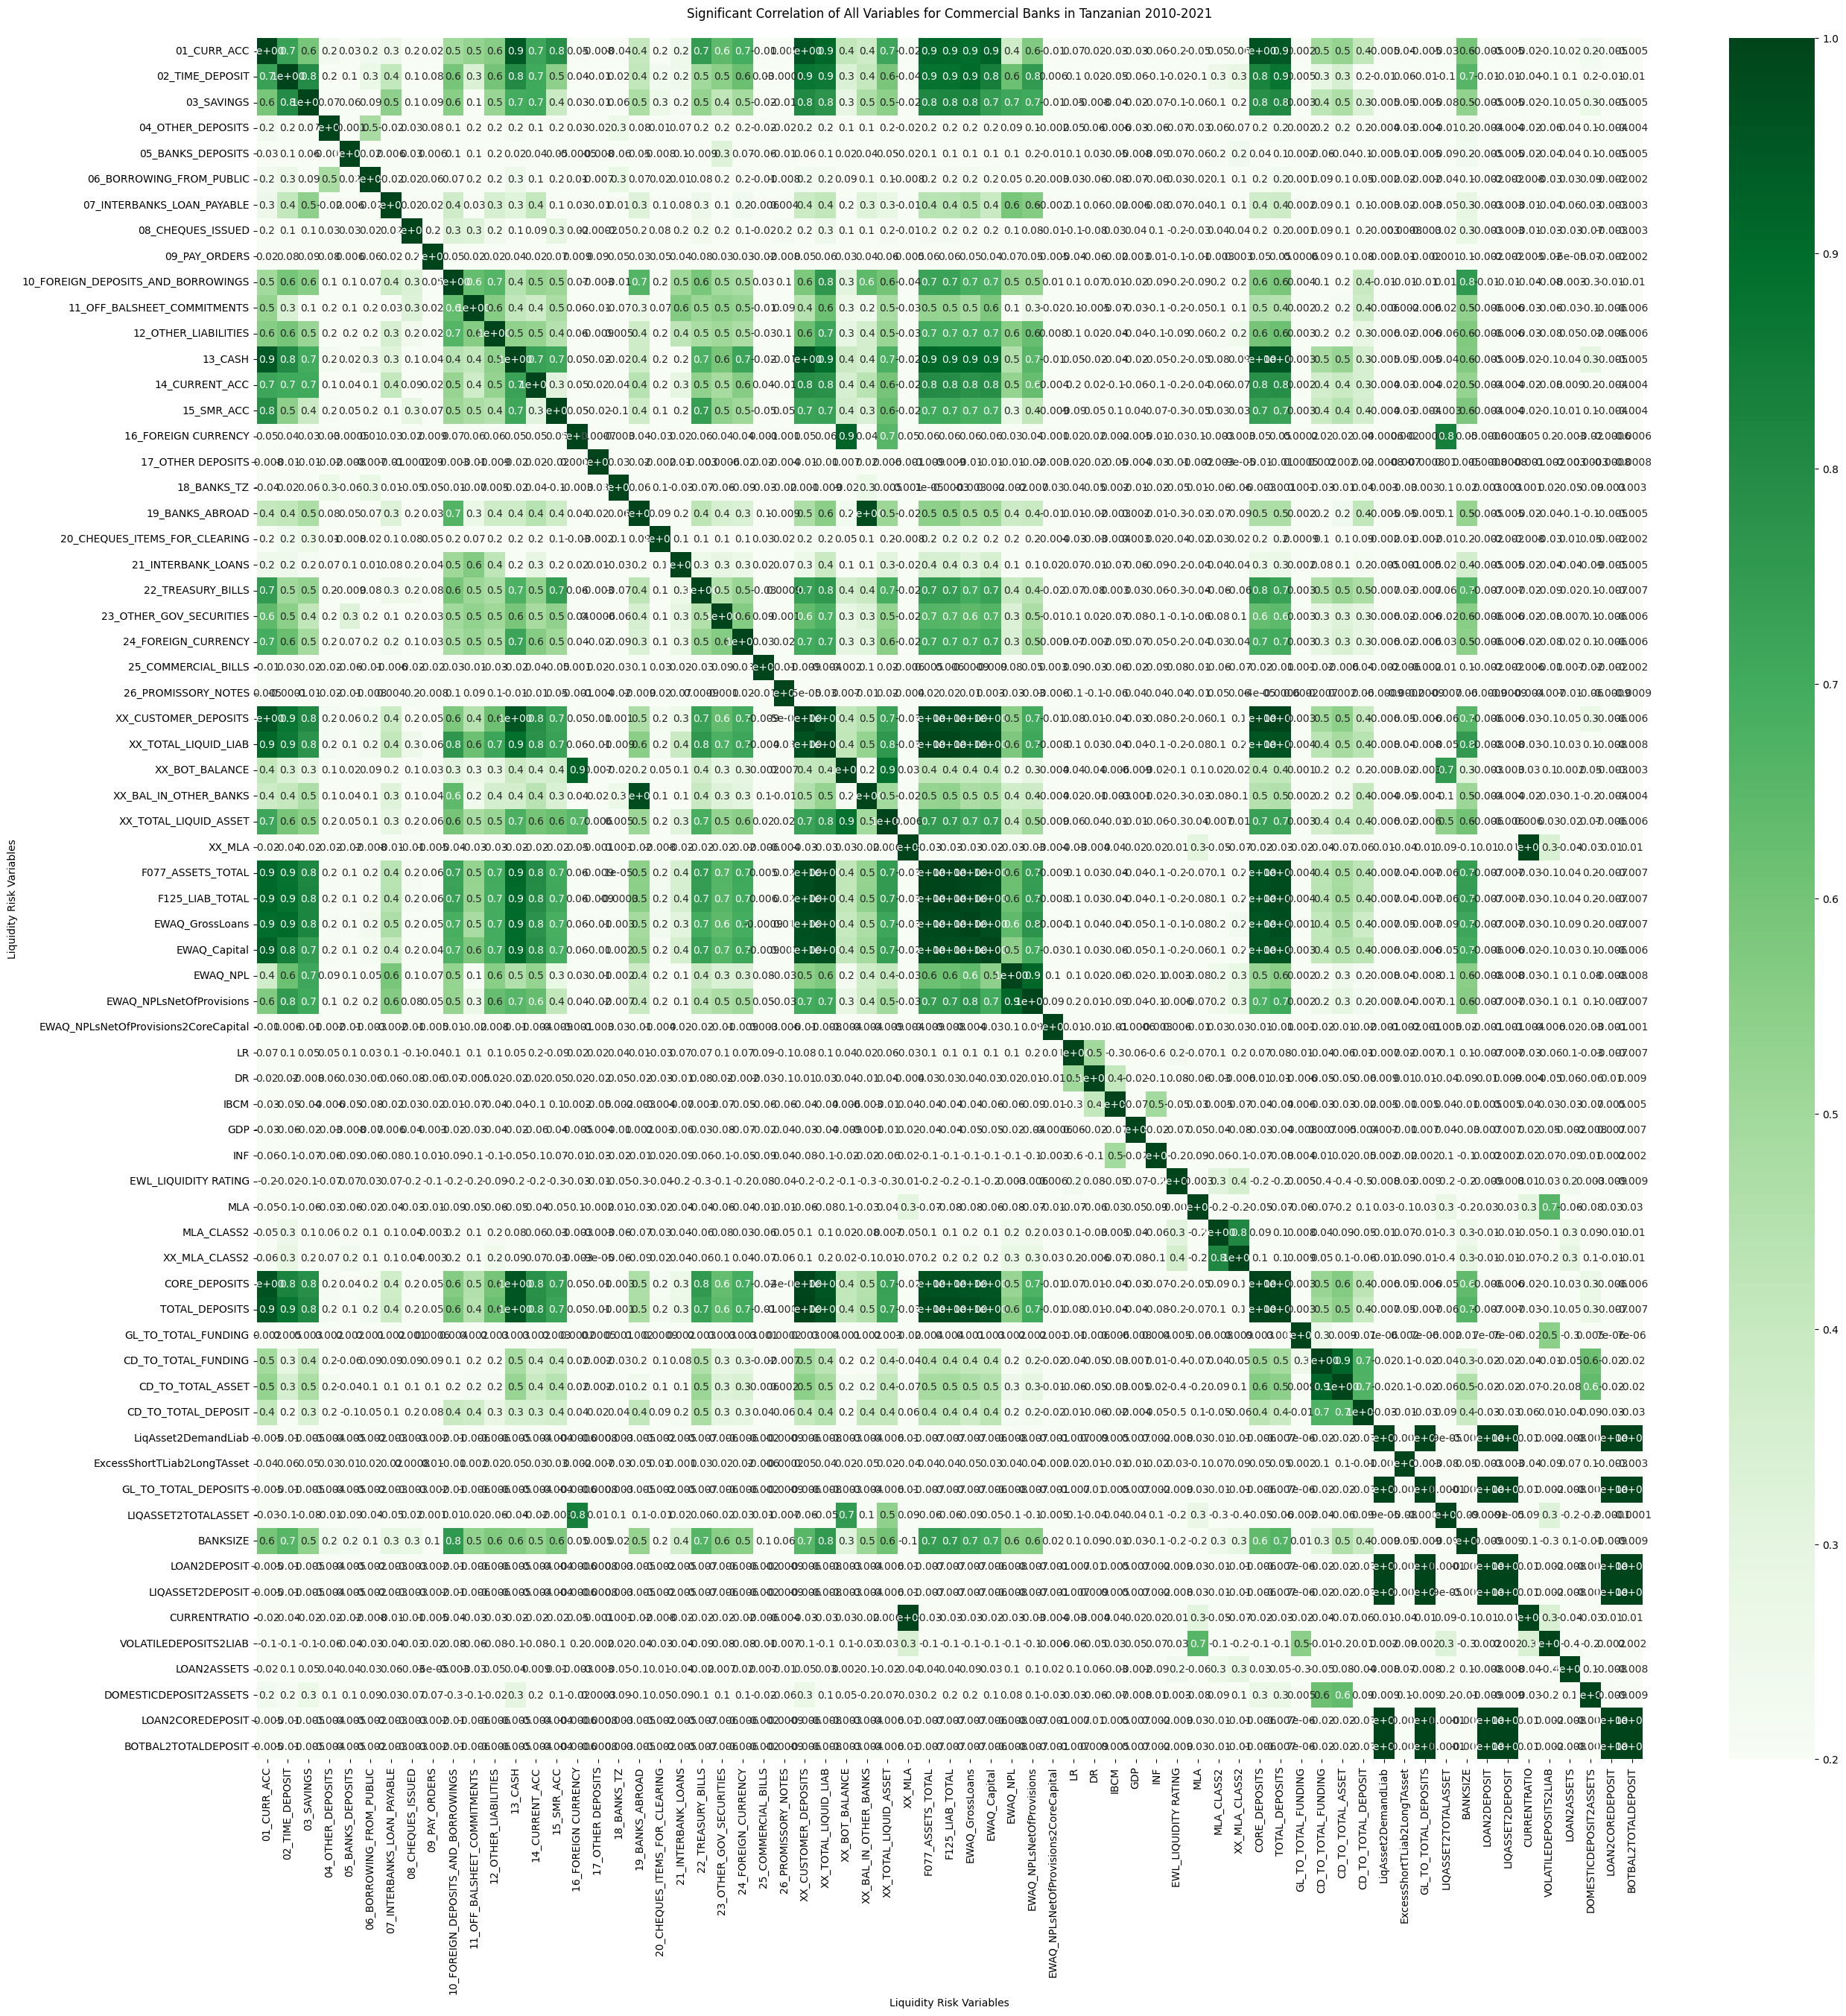

In [19]:
#visualize correlation of all variables for all institutions
plt.figure(figsize=(30,30))
sns.heatmap(df_new.iloc[:,2:].corr(),annot=True, vmin = 0.2, vmax=1, cmap="Greens", fmt='0.1')
plt.title('Significant Correlation of All Variables for Commercial Banks in Tanzanian 2010-2021', pad=20)
plt.xlabel('Liquidity Risk Variables')
plt.ylabel('Liquidity Risk Variables')
plt.plot()

[]

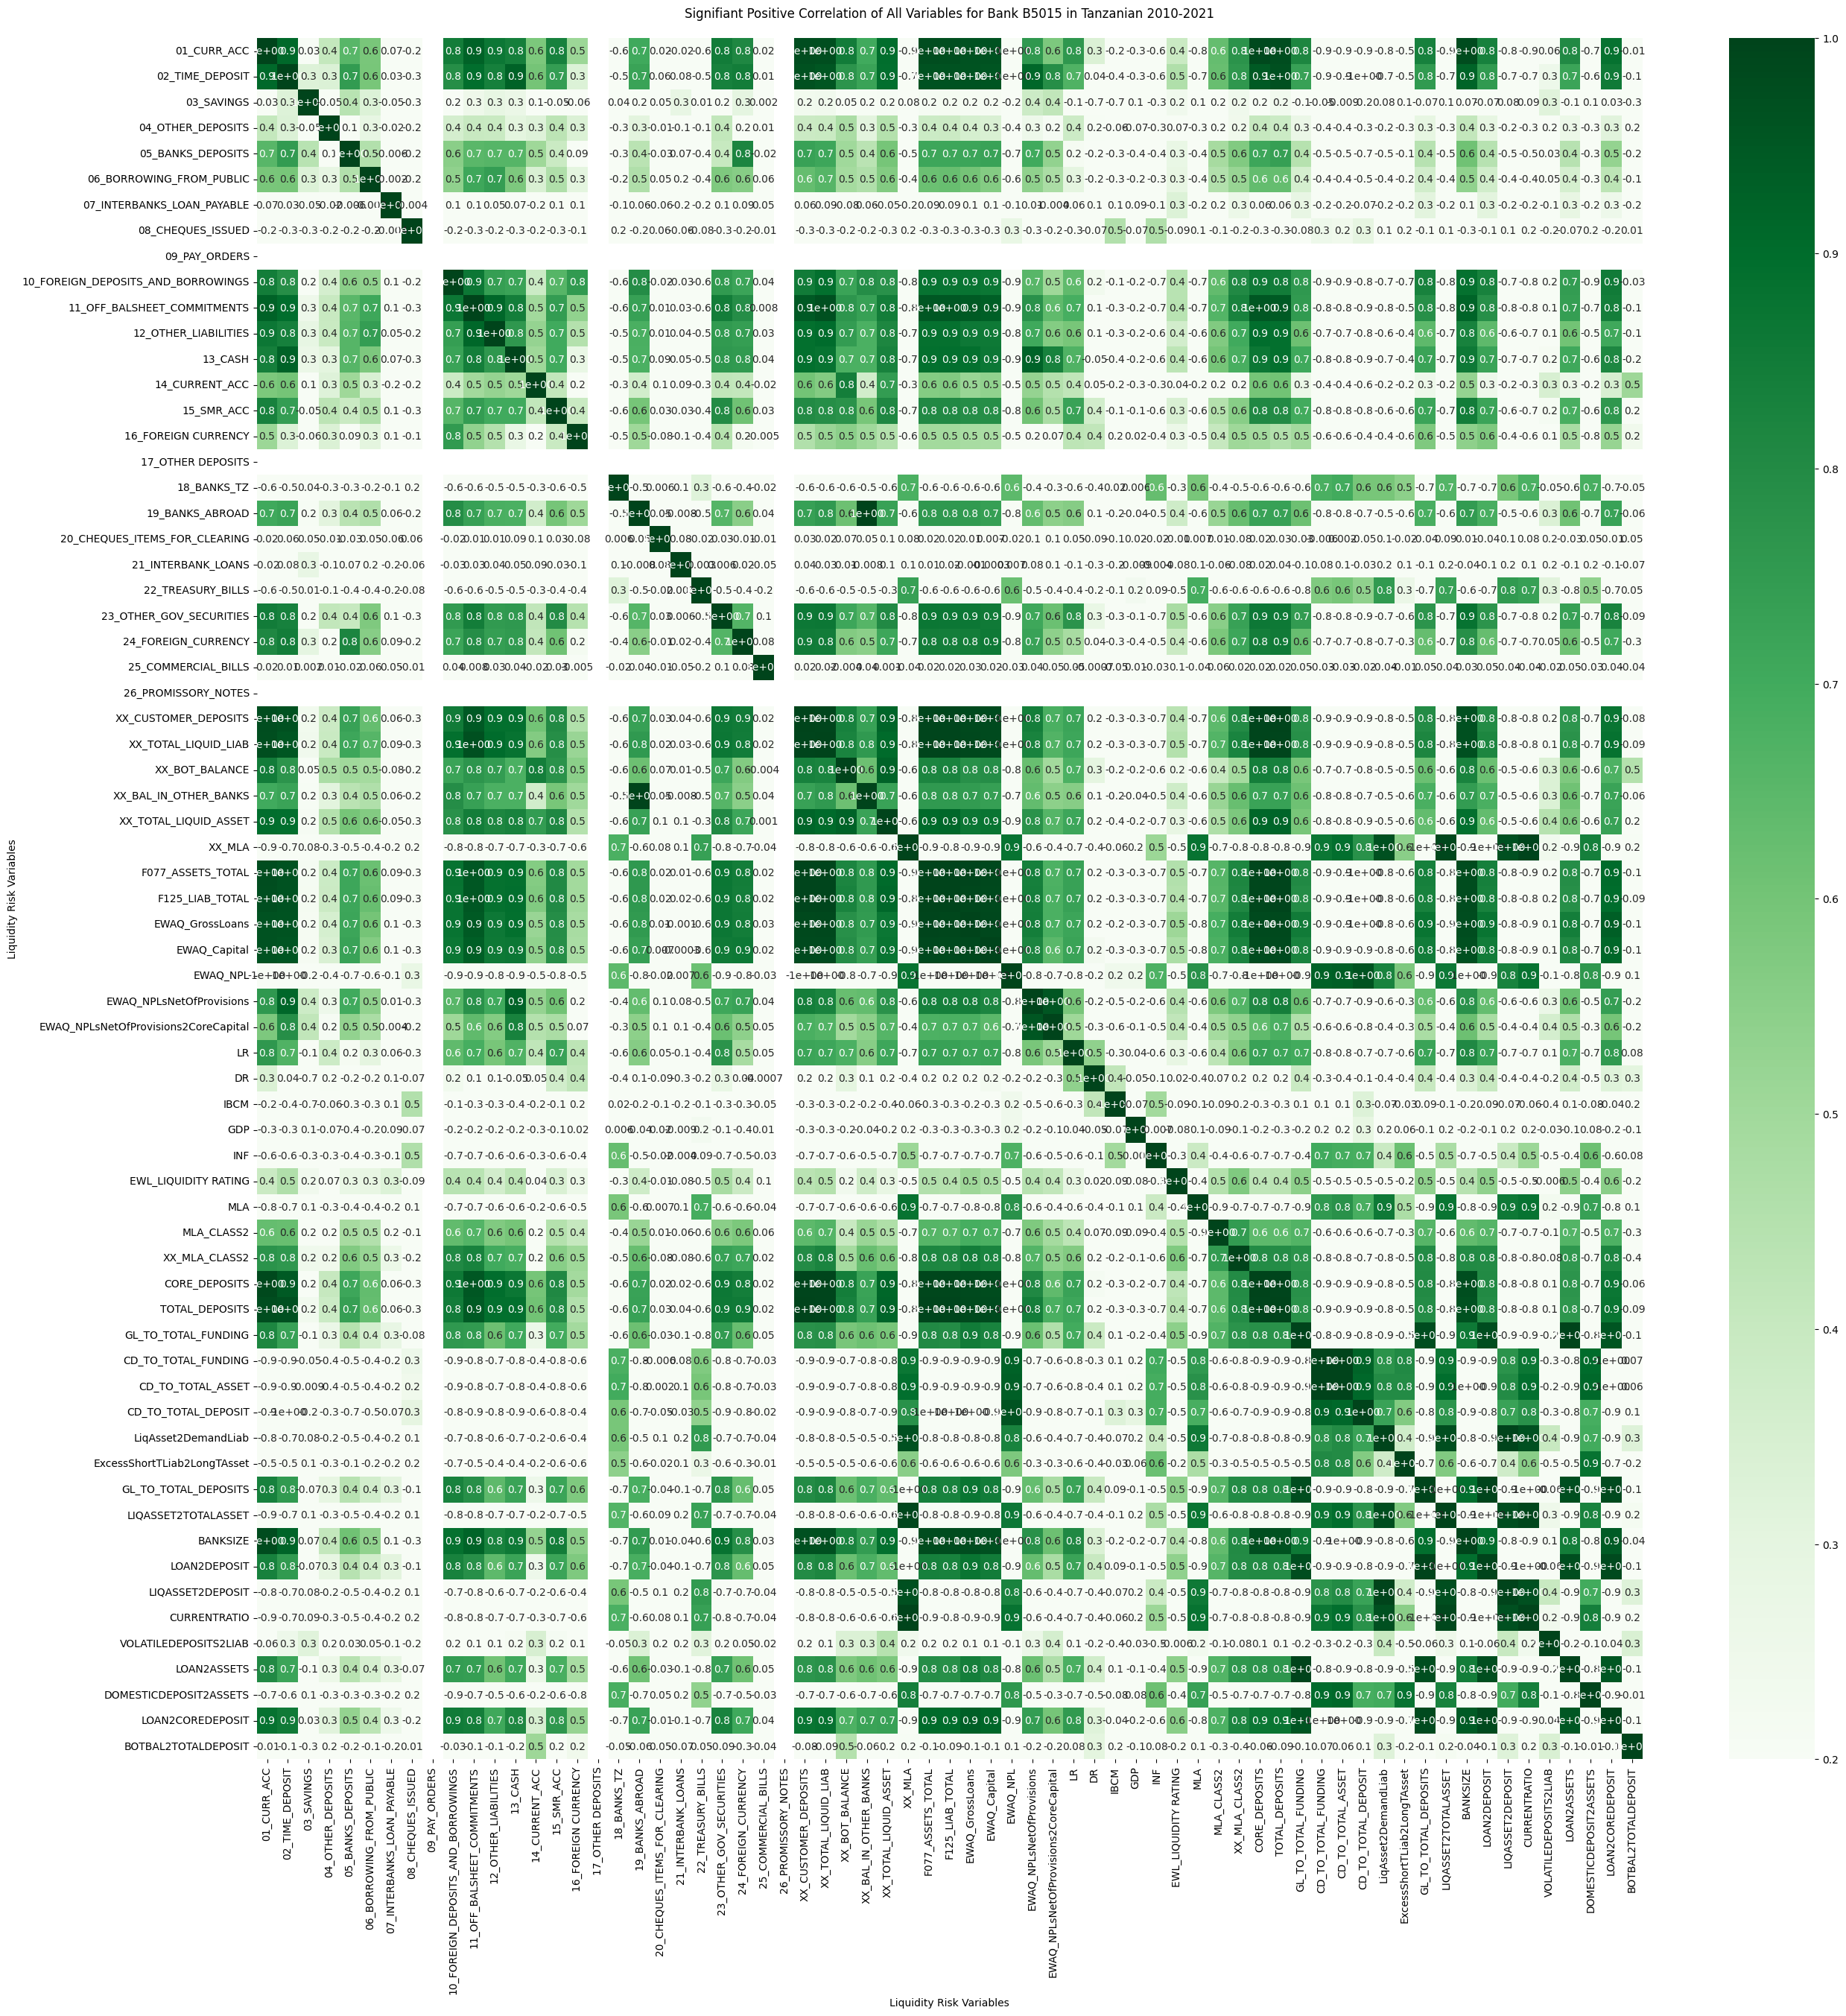

In [20]:
plt.figure(figsize=(30,30))
sns.heatmap(df_new.iloc[:,2:][df_new['INSTITUTIONCODE']=='B5015'].corr(),annot=True, vmin = 0.2, vmax=1, cmap="Greens", fmt='0.1')
plt.title('Signifiant Positive Correlation of All Variables for Bank B5015 in Tanzanian 2010-2021', pad=20)
plt.xlabel('Liquidity Risk Variables')
plt.ylabel('Liquidity Risk Variables')
plt.plot()



[]

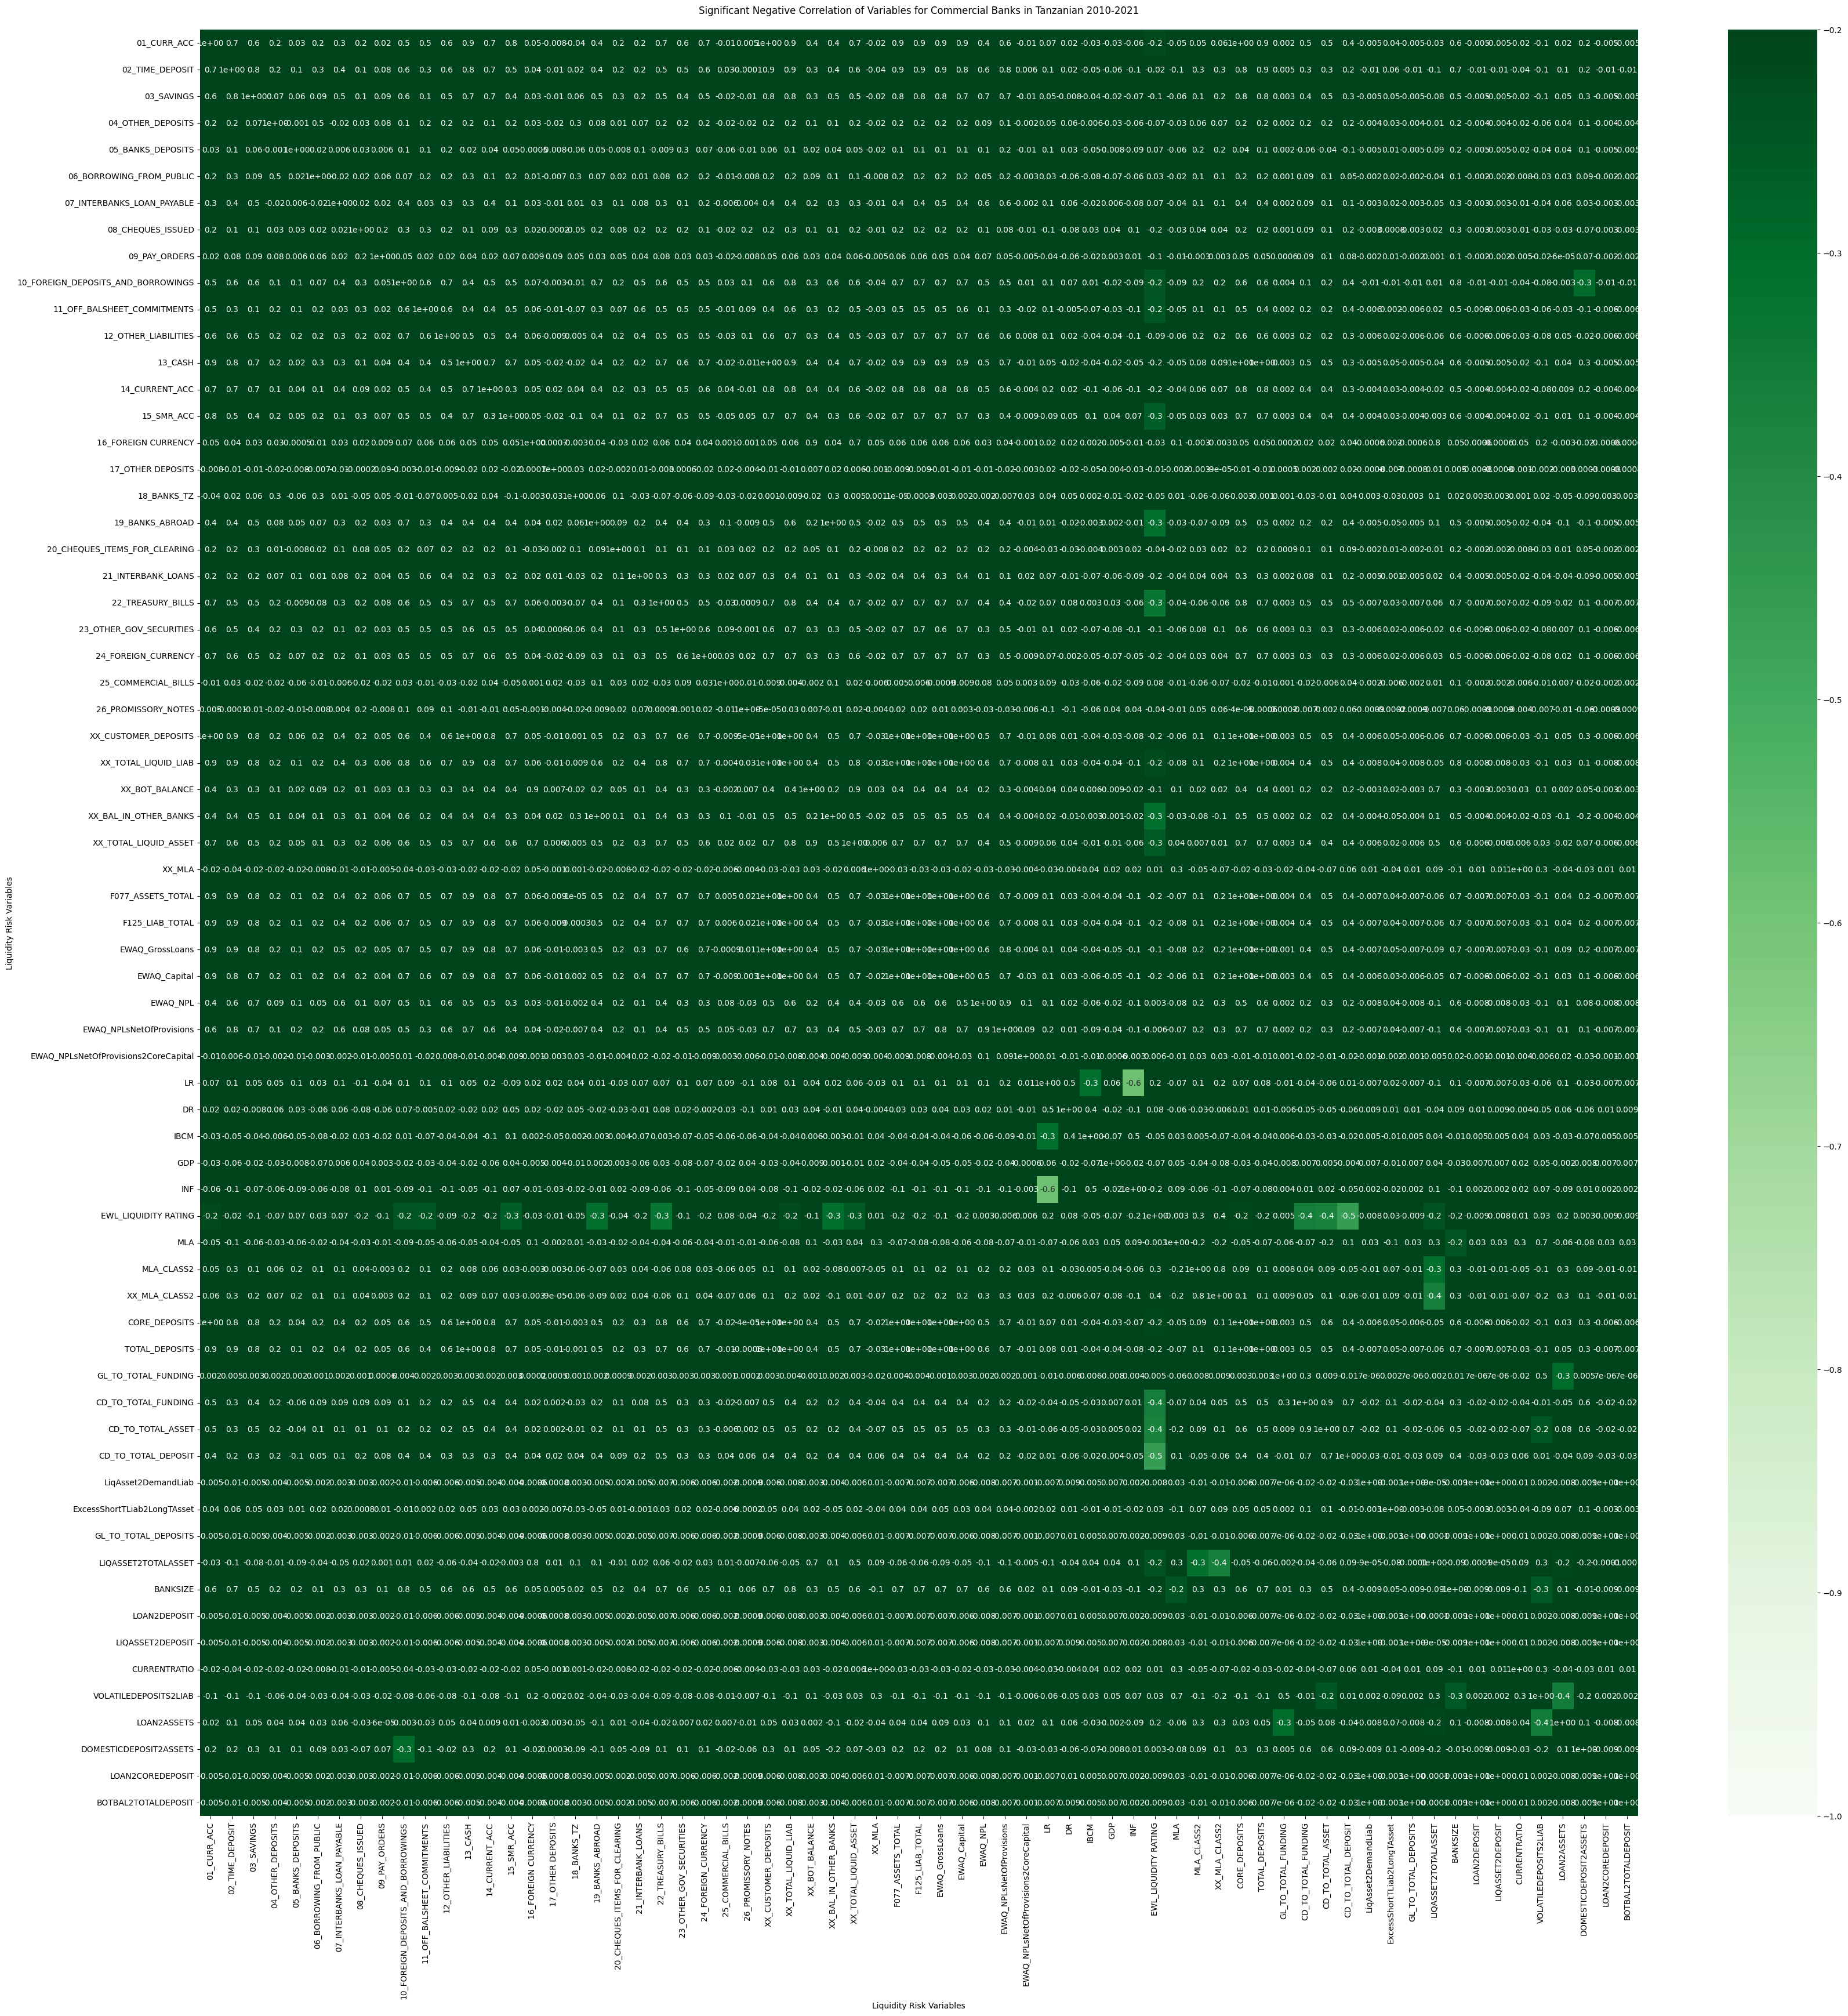

In [21]:
plt.figure(figsize=(40,40))
sns.heatmap(df_new.iloc[:,2:].corr(),annot=True, vmin = -1, vmax=-0.2, cmap="Greens", fmt='0.1')
plt.title('Significant Negative Correlation of Variables for Commercial Banks in Tanzanian 2010-2021', pad=20)
plt.xlabel('Liquidity Risk Variables')
plt.ylabel('Liquidity Risk Variables')
plt.plot()

**Analysis for Factors Identified In Literature**

In [22]:
df_new.columns

Index(['REPORTINGDATE', 'INSTITUTIONCODE', '01_CURR_ACC', '02_TIME_DEPOSIT',
       '03_SAVINGS', '04_OTHER_DEPOSITS', '05_BANKS_DEPOSITS',
       '06_BORROWING_FROM_PUBLIC', '07_INTERBANKS_LOAN_PAYABLE',
       '08_CHEQUES_ISSUED', '09_PAY_ORDERS',
       '10_FOREIGN_DEPOSITS_AND_BORROWINGS', '11_OFF_BALSHEET_COMMITMENTS',
       '12_OTHER_LIABILITIES', '13_CASH', '14_CURRENT_ACC', '15_SMR_ACC',
       '16_FOREIGN CURRENCY', '17_OTHER DEPOSITS', '18_BANKS_TZ',
       '19_BANKS_ABROAD', '20_CHEQUES_ITEMS_FOR_CLEARING',
       '21_INTERBANK_LOANS', '22_TREASURY_BILLS', '23_OTHER_GOV_SECURITIES',
       '24_FOREIGN_CURRENCY', '25_COMMERCIAL_BILLS', '26_PROMISSORY_NOTES',
       'XX_CUSTOMER_DEPOSITS', 'XX_TOTAL_LIQUID_LIAB', 'XX_BOT_BALANCE',
       'XX_BAL_IN_OTHER_BANKS', 'XX_TOTAL_LIQUID_ASSET', 'XX_MLA',
       'F077_ASSETS_TOTAL', 'F125_LIAB_TOTAL', 'EWAQ_GrossLoans',
       'EWAQ_Capital', 'EWAQ_NPL', 'EWAQ_NPLsNetOfProvisions',
       'EWAQ_NPLsNetOfProvisions2CoreCapital', 'LR', 

In [23]:
df_factors = df_new[['CURRENTRATIO',
                         'LIQASSET2DEPOSIT',
                         'TOTAL_DEPOSITS',
                         'CORE_DEPOSITS',
                         'LOAN2DEPOSIT',
                         'VOLATILEDEPOSITS2LIAB',
                         'BOTBAL2TOTALDEPOSIT',
                         'LOAN2COREDEPOSIT',
                         'DOMESTICDEPOSIT2ASSETS',
                         'BANKSIZE',
                         'GDP',
                         'INF',
                         'LOAN2ASSETS',
                         'EWAQ_NPL',
                         'EWAQ_NPLsNetOfProvisions',
                         'EWAQ_NPLsNetOfProvisions2CoreCapital',
                         'LR',
                         'CD_TO_TOTAL_ASSET',
                         'LIQASSET2TOTALASSET',
                         'ExcessShortTLiab2LongTAsset']]

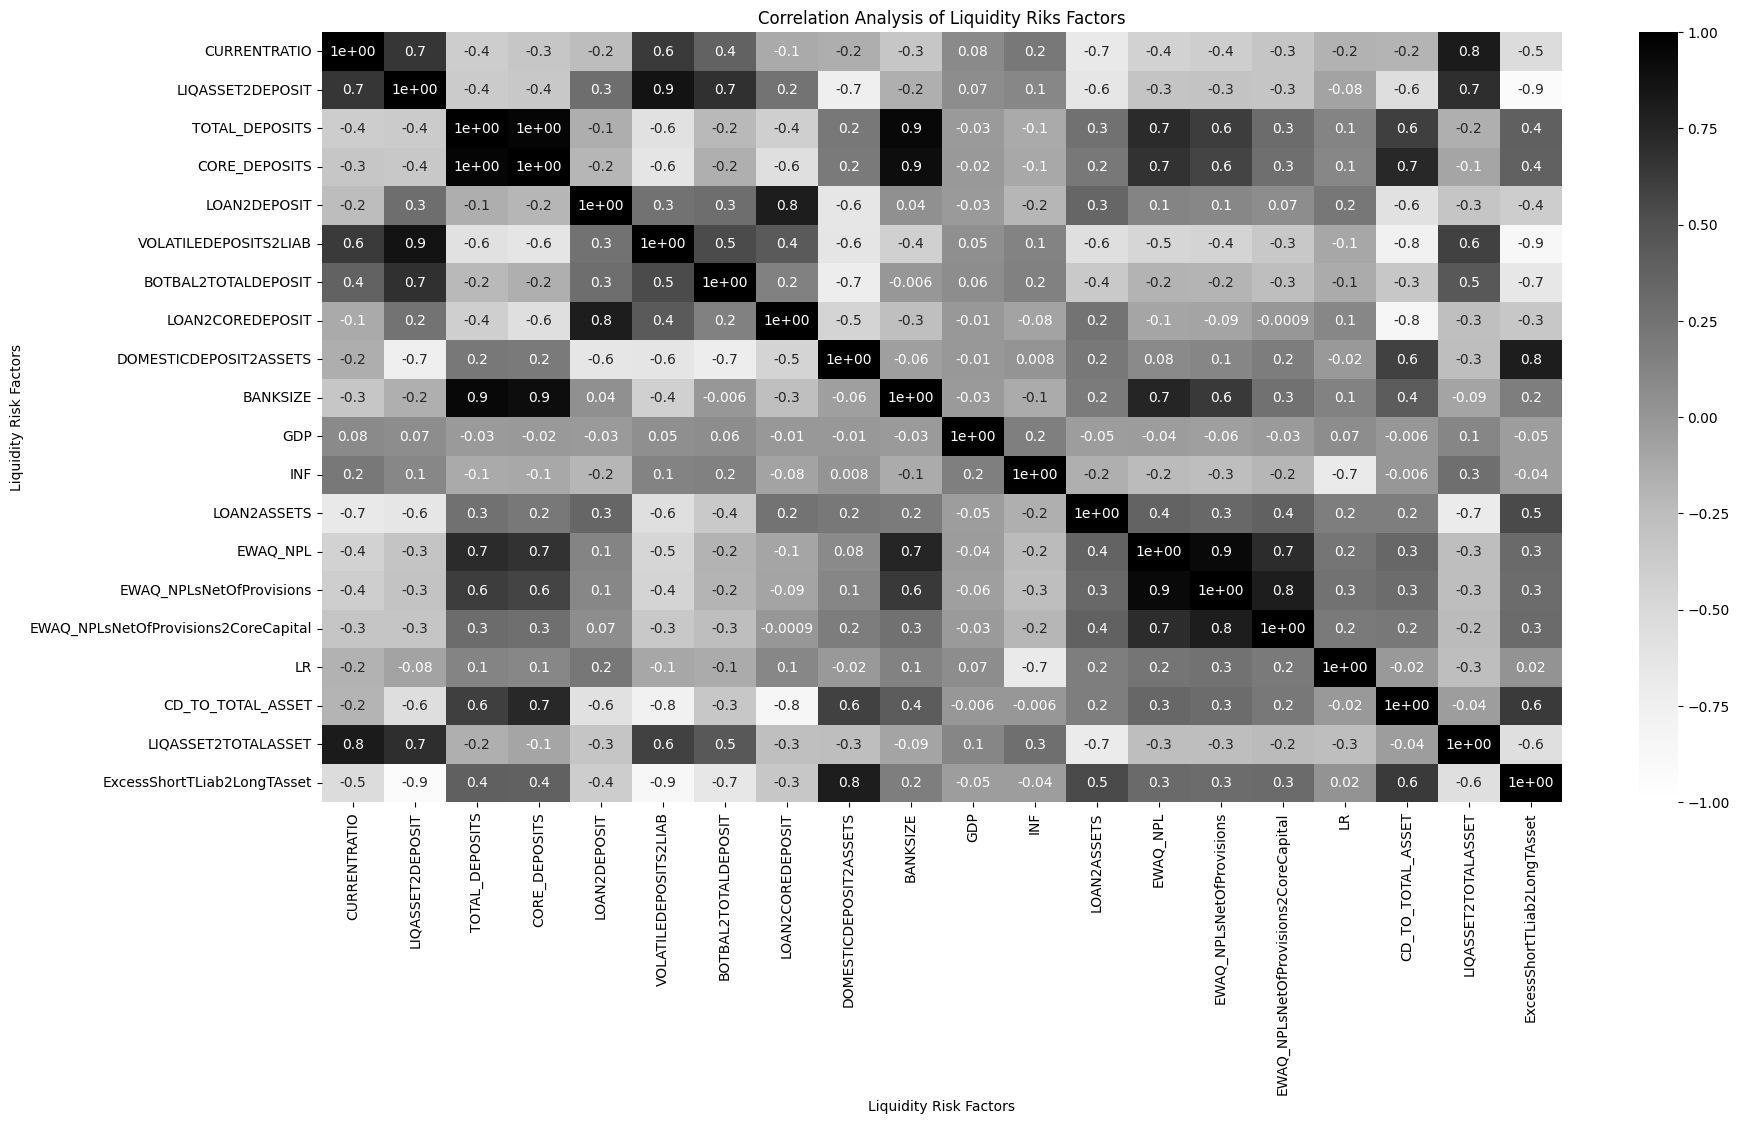

In [24]:
plt.figure(figsize=(20,10))
sns.heatmap(df_factors.corr(method='spearman', min_periods=1),annot=True, vmin = -1, vmax=1, cmap="Greys", fmt='0.1')
plt.title('Correlation Analysis of Liquidity Riks Factors')
plt.xlabel('Liquidity Risk Factors')
plt.ylabel('Liquidity Risk Factors')
plt.show()

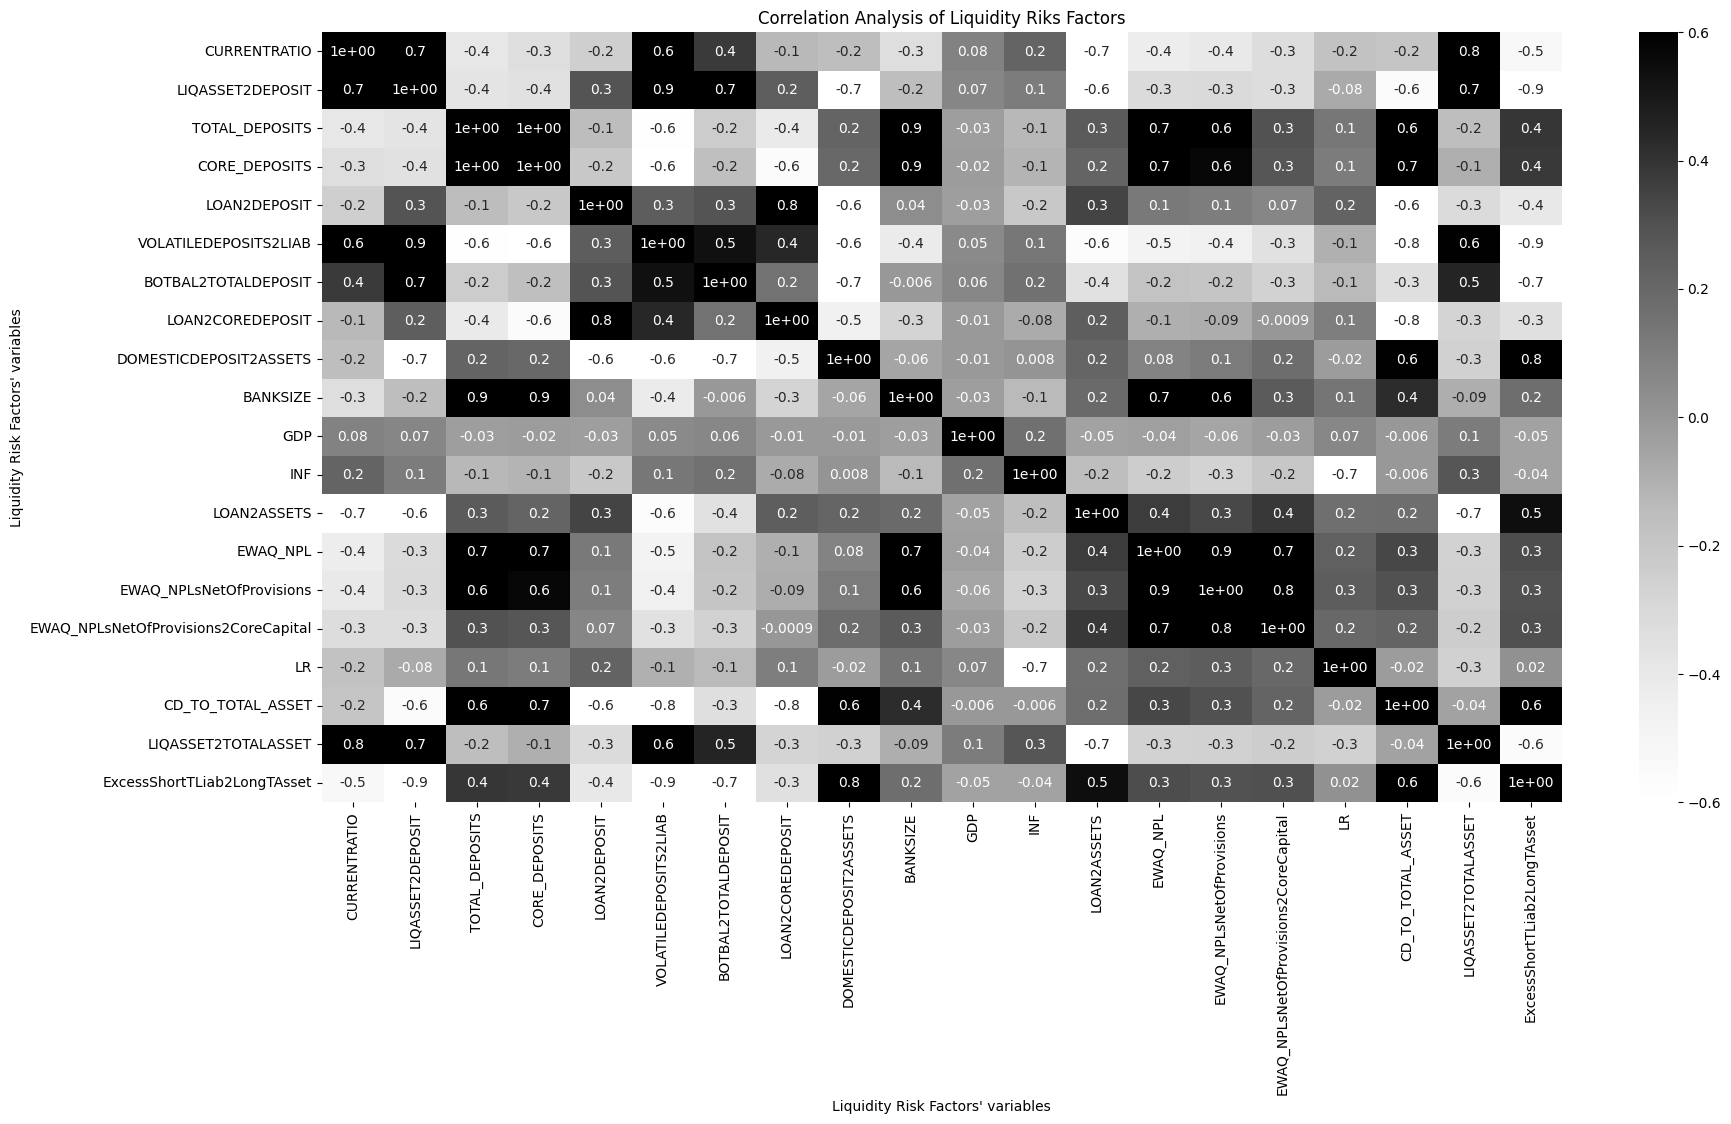

In [25]:
plt.figure(figsize=(20,10))
sns.heatmap(df_factors.corr(method='spearman', min_periods=1),annot=True, vmin = -0.6, vmax=0.6, cmap="Greys", fmt='0.1')
plt.title('Correlation Analysis of Liquidity Riks Factors')
plt.xlabel("Liquidity Risk Factors' variables")
plt.ylabel("Liquidity Risk Factors' variables")
plt.show()

#### Detailed Pearson, Spearman, and Kendall Correlation for Factors Analysis on All, Big, Intermediate, and Small Banks

In [26]:
"""
Clustering of Banks was done in a separate process using Elbow method and KNN algorithm on
Total Assets of Banks as of 31 Dec 2021 that included 32 banks out of 38. 
Three clusters were obtained that included 2 big banks, 10 intermediate banks, and 20 small banks 
"""

'\nClustering of Banks was done in a separate process using Elbow method and KNN algorithm on\nTotal Assets of Banks as of 31 Dec 2021 that included 32 banks out of 38. \nThree clusters were obtained that included 2 big banks, 10 intermediate banks, and 20 small banks \n'

In [27]:
#On monthly dataset - all banks
dataset_corr_pearson=dataset.iloc[:,2:-1].corr(method='pearson', min_periods=1)
dataset_corr_pearson = dataset_corr_pearson['MLA'].reset_index()
dataset_corr_pearson.rename(columns = {'MLA':'Pearson'}, inplace = True)
dataset_corr_spearman=dataset.iloc[:,2:-1].corr(method='spearman', min_periods=1)
dataset_corr_spearman  = dataset_corr_spearman['MLA'].reset_index()
dataset_corr_spearman.rename(columns = {'MLA':'Spearman'}, inplace = True)
dataset_corr_kendall=dataset.iloc[:,2:-1].corr(method='kendall', min_periods=1)
dataset_corr_kendall= dataset_corr_kendall['MLA'].reset_index()
dataset_corr_kendall.rename(columns = {'MLA':'Kendall'}, inplace = True)
#df_corr_kendall

dataset_corr = pd.concat([dataset_corr_pearson,dataset_corr_spearman], axis=0)
dataset_corr = pd.concat([dataset_corr,dataset_corr_kendall], axis=0)


dataset_corr = dataset_corr_pearson.merge(dataset_corr_spearman[['index', 'Spearman']])
dataset_corr = dataset_corr.merge(dataset_corr_kendall[['index', 'Kendall']])
dataset_corr.rename(columns = {'index':'Variables'}, inplace = True)
dataset_corr.to_csv(config.monthly_correlations)
dataset_corr

Variables   Pearson  Spearman   Kendall
0                         F001_ASSET_CASH -0.052933 -0.266983 -0.177975
1                      F002_ASSET_BAL_BOT -0.055913 -0.160359 -0.107229
2                  F003_ASSET_BAL_BOT_SMR -0.052210 -0.046624 -0.037739
3      F004_ASSET_BAL_BOT_CURRENT_ACCOUNT -0.041830 -0.103752 -0.068821
4               F005_ASSET_BAL_BOT_OTHERS  0.003200  0.050200  0.040987
..                                    ...       ...       ...       ...
234              EWAQ_NPLsNetOfProvisions -0.068894 -0.382755 -0.259329
235  EWAQ_NPLsNetOfProvisions2CoreCapital -0.002406 -0.315018 -0.211665
236                  EWAQ_NPLs2GrossLoans -0.078847 -0.250164 -0.169227
237              EWAQ_AssetsQualityRating -0.101248 -0.253313 -0.190210
238                            EWAQ_Loans -0.599444 -0.813772 -0.612717

[239 rows x 4 columns]

In [28]:
df = dataset.iloc[:,2:-1]
df

F001_ASSET_CASH  F002_ASSET_BAL_BOT  F003_ASSET_BAL_BOT_SMR  \
0        9.570422e+09        5.260077e+10            3.700000e+10   
1        6.996645e+09        3.554718e+10            3.200000e+10   
2        8.689629e+09        3.744132e+10            3.350000e+10   
3        6.811311e+09        3.527009e+10            3.250000e+10   
4        9.160128e+09        4.927299e+10            3.982500e+10   
...               ...                 ...                     ...   
4688     6.934755e+08        1.703142e+09            0.000000e+00   
4689     3.887219e+08        1.388285e+09            0.000000e+00   
4690     4.772036e+08        7.915250e+08            0.000000e+00   
4691     5.124198e+08        8.769145e+08            0.000000e+00   
4692     2.832460e+08        1.522144e+08            0.000000e+00   

      F004_ASSET_BAL_BOT_CURRENT_ACCOUNT  F005_ASSET_BAL_BOT_OTHERS  \
0                           1.560077e+10                        0.0   
1                           3.547185e+09                        0.0   
2                           3.941316e+09                        0.0   
3                           2.770089e+09                        0.0   
4                           9.447986e+09                        0.0   
...                                  ...                        ...   
4688                        1.703142e+09                        0.0   
4689                        1.388285e+09                        0.0   
4690                        7.915250e+08                        0.0   
4691                        8.769145e+08                        0.0   
4692                        1.522144e+08                        0.0   

      F006_ASSET_BAL_OTHER_BANKS  F007_ASSET_BAL_OTHER_BANKS_TZ  \
0                   1.348740e+11                   1.622160e+10   
1                   1.482240e+11                   7.535208e+08   
2                   1.621370e+11                   5.570919e+09   
3                   2.244100e+11                   8.739334e+09   
4                   1.893920e+11                   1.524899e+09   
...                          ...                            ...   
4688                2.742275e+08                   2.746237e+08   
4689                8.007882e+08                   8.035486e+08   
4690                2.992667e+08                   3.003208e+08   
4691                9.021986e+08                   9.052311e+08   
4692                4.022823e+07                   4.036516e+07   

      F008_ASSET_BAL_OTHER_BANKS_ABROAD  \
0                          1.186520e+11   
1                          1.474710e+11   
2                          1.565660e+11   
3                          2.156710e+11   
4                          1.878670e+11   
...                                 ...   
4688                       0.000000e+00   
4689                       0.000000e+00   
4690                       0.000000e+00   
4691                       0.000000e+00   
4692                       0.000000e+00   

      F009_ASSET_BAL_OTHER_BANKS_ABROAD_FIXED_INV  \
0                                    8.254988e+10   
1                                    1.161860e+11   
2                                    4.158973e+10   
3                                    1.071620e+11   
4                                    1.272350e+11   
...                                           ...   
4688                                 0.000000e+00   
4689                                 0.000000e+00   
4690                                 0.000000e+00   
4691                                 0.000000e+00   
4692                                 0.000000e+00   

      F010_ASSET_BAL_OTHER_BANKS_ABROAD_OTHER_ACC  ...  EWL_LIQUIDITY RATING  \
0                                    3.610213e+10  ...                   1.0   
1                                    3.128441e+10  ...                   1.0   
2                                    1.149760e+11  ...                   1.0   
3                                    1.085090

In [29]:
mask = ((df_new['MLA'] > 0) & (df_new['MLA'] < 100))

In [30]:
#on final weekly dataset - all banks
df_new1 = df_new.iloc[:,2:-1][mask]
df_corr_pearson=df_new1.corr(method='pearson', min_periods=1)
df_corr_pearson = df_corr_pearson['XX_MLA_CLASS2'].reset_index()
df_corr_pearson.rename(columns = {'XX_MLA_CLASS2':'Pearson'}, inplace = True)
df_corr_spearman=df_new1.corr(method='spearman', min_periods=1)
df_corr_spearman  = df_corr_spearman['XX_MLA_CLASS2'].reset_index()
df_corr_spearman.rename(columns = {'XX_MLA_CLASS2':'Spearman'}, inplace = True)
df_corr_kendall=df_new1.corr(method='kendall', min_periods=1)
df_corr_kendall= df_corr_kendall['XX_MLA_CLASS2'].reset_index()
df_corr_kendall.rename(columns = {'XX_MLA_CLASS2':'Kendall'}, inplace = True)
#df_corr_kendall

#pd.merge(df_corr_pearson, df_corr_spearman, df_corr_kendall, on='index')
#df_corr = pd.merge(df_corr_pearson, df_corr_spearman, how='inner', left_on='index')
df_corr = df_corr_pearson.merge(df_corr_spearman[['index', 'Spearman']])
df_corr = df_corr.merge(df_corr_kendall[['index', 'Kendall']])
df_corr.rename(columns = {'index':'Variables'}, inplace = True)
df_corr.to_csv(config.correlations_int)


In [31]:
df_corr

Variables   Pearson  Spearman   Kendall
0              01_CURR_ACC  0.050198  0.106905  0.081828
1          02_TIME_DEPOSIT  0.268070  0.380121  0.293528
2               03_SAVINGS  0.146066  0.308747  0.238558
3        04_OTHER_DEPOSITS  0.058467  0.015696  0.012834
4        05_BANKS_DEPOSITS  0.229727  0.103322  0.089942
..                     ...       ...       ...       ...
61            CURRENTRATIO -0.673946 -0.939799 -0.816298
62   VOLATILEDEPOSITS2LIAB -0.444811 -0.522089 -0.411246
63             LOAN2ASSETS  0.547549  0.575424  0.460445
64  DOMESTICDEPOSIT2ASSETS  0.090744  0.097671  0.074890
65        LOAN2COREDEPOSIT -0.008312  0.124640  0.096164

[66 rows x 4 columns]

In [32]:
#On final weekly dataset Big Banks
mask_inst =( (df_new['INSTITUTIONCODE']=='B5015') | (df_new['INSTITUTIONCODE']=='B5912'))
df_new1 = df_new.iloc[:,2:-1][mask][mask_inst]
df_corr_pearson=df_new1.corr(method='pearson', min_periods=1)
df_corr_pearson = df_corr_pearson['XX_MLA_CLASS2'].reset_index()
df_corr_pearson.rename(columns = {'XX_MLA_CLASS2':'Pearson'}, inplace = True)
df_corr_spearman=df_new1.corr(method='spearman', min_periods=1)
df_corr_spearman  = df_corr_spearman['XX_MLA_CLASS2'].reset_index()
df_corr_spearman.rename(columns = {'XX_MLA_CLASS2':'Spearman'}, inplace = True)
df_corr_kendall=df_new1.corr(method='kendall', min_periods=1)
df_corr_kendall= df_corr_kendall['XX_MLA_CLASS2'].reset_index()
df_corr_kendall.rename(columns = {'XX_MLA_CLASS2':'Kendall'}, inplace = True)
#df_corr_kendall

#pd.merge(df_corr_pearson, df_corr_spearman, df_corr_kendall, on='index')
#df_corr = pd.merge(df_corr_pearson, df_corr_spearman, how='inner', left_on='index')
df_corr = df_corr_pearson.merge(df_corr_spearman[['index', 'Spearman']])
df_corr = df_corr.merge(df_corr_kendall[['index', 'Kendall']])
df_corr.rename(columns = {'index':'Variables'}, inplace = True)
df_corr.to_csv(config.correlations_int)
#dataset_corr1

/tmp/ipykernel_63/2662023759.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_new1 = df_new.iloc[:,2:-1][mask][mask_inst]


In [33]:
df_corr

Variables   Pearson  Spearman   Kendall
0              01_CURR_ACC  0.167472  0.155700  0.127350
1          02_TIME_DEPOSIT  0.789268  0.764481  0.638592
2               03_SAVINGS  0.616735  0.600262  0.494610
3        04_OTHER_DEPOSITS -0.143354 -0.425165 -0.345469
4        05_BANKS_DEPOSITS  0.427147  0.592213  0.495287
..                     ...       ...       ...       ...
61            CURRENTRATIO -0.871328 -0.916846 -0.789058
62   VOLATILEDEPOSITS2LIAB -0.025379 -0.011111 -0.020099
63             LOAN2ASSETS  0.608351  0.570514  0.445433
64  DOMESTICDEPOSIT2ASSETS -0.500037 -0.434690 -0.323551
65        LOAN2COREDEPOSIT  0.640845  0.558094  0.438174

[66 rows x 4 columns]

In [34]:
dataset_corr

Variables   Pearson  Spearman   Kendall
0                         F001_ASSET_CASH -0.052933 -0.266983 -0.177975
1                      F002_ASSET_BAL_BOT -0.055913 -0.160359 -0.107229
2                  F003_ASSET_BAL_BOT_SMR -0.052210 -0.046624 -0.037739
3      F004_ASSET_BAL_BOT_CURRENT_ACCOUNT -0.041830 -0.103752 -0.068821
4               F005_ASSET_BAL_BOT_OTHERS  0.003200  0.050200  0.040987
..                                    ...       ...       ...       ...
234              EWAQ_NPLsNetOfProvisions -0.068894 -0.382755 -0.259329
235  EWAQ_NPLsNetOfProvisions2CoreCapital -0.002406 -0.315018 -0.211665
236                  EWAQ_NPLs2GrossLoans -0.078847 -0.250164 -0.169227
237              EWAQ_AssetsQualityRating -0.101248 -0.253313 -0.190210
238                            EWAQ_Loans -0.599444 -0.813772 -0.612717

[239 rows x 4 columns]

In [35]:
#On final weekly dataset Intermediate Banks
mask = (df_new['MLA'] > 0) & (df_new['MLA'] < 100) & (
    (df_new['INSTITUTIONCODE']=='B5412') | (df_new['INSTITUTIONCODE']=='B5512') |
    (df_new['INSTITUTIONCODE']=='B5213') | (df_new['INSTITUTIONCODE']=='B5413') |
    (df_new['INSTITUTIONCODE']=='B5613') | (df_new['INSTITUTIONCODE']=='B5014') |
    (df_new['INSTITUTIONCODE']=='B5914') | (df_new['INSTITUTIONCODE']=='B5115') |
    (df_new['INSTITUTIONCODE']=='B5515') | (df_new['INSTITUTIONCODE']=='B5815'))
df_new1 = df_new.iloc[:,2:-1][mask]
df_corr_pearson=df_new1.corr(method='pearson', min_periods=1)
df_corr_pearson = df_corr_pearson['XX_MLA_CLASS2'].reset_index()
df_corr_pearson.rename(columns = {'XX_MLA_CLASS2':'Pearson'}, inplace = True)
df_corr_spearman=df_new1.corr(method='spearman', min_periods=1)
df_corr_spearman  = df_corr_spearman['XX_MLA_CLASS2'].reset_index()
df_corr_spearman.rename(columns = {'XX_MLA_CLASS2':'Spearman'}, inplace = True)
df_corr_kendall=df_new1.corr(method='kendall', min_periods=1)
df_corr_kendall= df_corr_kendall['XX_MLA_CLASS2'].reset_index()
df_corr_kendall.rename(columns = {'XX_MLA_CLASS2':'Kendall'}, inplace = True)
#df_corr_kendall

#pd.merge(df_corr_pearson, df_corr_spearman, df_corr_kendall, on='index')
#df_corr = pd.merge(df_corr_pearson, df_corr_spearman, how='inner', left_on='index')
df_corr = df_corr_pearson.merge(df_corr_spearman[['index', 'Spearman']])
df_corr = df_corr.merge(df_corr_kendall[['index', 'Kendall']])
df_corr.rename(columns = {'index':'Variables'}, inplace = True)
df_corr.to_csv(config.correlations_int)

In [36]:
df_corr

Variables   Pearson  Spearman   Kendall
0              01_CURR_ACC -0.215607 -0.242232 -0.183598
1          02_TIME_DEPOSIT  0.423337  0.422049  0.328778
2               03_SAVINGS  0.113722  0.337113  0.262485
3        04_OTHER_DEPOSITS  0.060630 -0.113463 -0.083692
4        05_BANKS_DEPOSITS  0.295739  0.218385  0.179560
..                     ...       ...       ...       ...
61            CURRENTRATIO -0.791142 -0.946904 -0.826309
62   VOLATILEDEPOSITS2LIAB -0.472945 -0.448776 -0.358011
63             LOAN2ASSETS  0.649884  0.604057  0.481826
64  DOMESTICDEPOSIT2ASSETS  0.217544  0.210701  0.164683
65        LOAN2COREDEPOSIT  0.515998  0.460859  0.357239

[66 rows x 4 columns]

In [37]:
#On final weekly dataset Small Banks
mask = (df_new['MLA'] > 0) & (df_new['MLA'] < 100) & (
    (df_new['INSTITUTIONCODE']=='B5812') | (df_new['INSTITUTIONCODE']=='B5813') |
    (df_new['INSTITUTIONCODE']=='B5913') | (df_new['INSTITUTIONCODE']=='B5114') |
    (df_new['INSTITUTIONCODE']=='B5814') | (df_new['INSTITUTIONCODE']=='B5215') |
    (df_new['INSTITUTIONCODE']=='B5016') | (df_new['INSTITUTIONCODE']=='B5116') |
    (df_new['INSTITUTIONCODE']=='B5716') | (df_new['INSTITUTIONCODE']=='B5117') |

    (df_new['INSTITUTIONCODE']=='B5417') | (df_new['INSTITUTIONCODE']=='B5717') |
    (df_new['INSTITUTIONCODE']=='B5917') | (df_new['INSTITUTIONCODE']=='B5018') |
    (df_new['INSTITUTIONCODE']=='B5318') | (df_new['INSTITUTIONCODE']=='B5418') |
    (df_new['INSTITUTIONCODE']=='B5619') | (df_new['INSTITUTIONCODE']=='B5719') |
    (df_new['INSTITUTIONCODE']=='B5919') | (df_new['INSTITUTIONCODE']=='B5120') )
df_new1 = df_new.iloc[:,2:-1][mask]
df_corr_pearson=df_new1.corr(method='pearson', min_periods=1)
df_corr_pearson = df_corr_pearson['XX_MLA_CLASS2'].reset_index()
df_corr_pearson.rename(columns = {'XX_MLA_CLASS2':'Pearson'}, inplace = True)
df_corr_spearman=df_new1.corr(method='spearman', min_periods=1)
df_corr_spearman  = df_corr_spearman['XX_MLA_CLASS2'].reset_index()
df_corr_spearman.rename(columns = {'XX_MLA_CLASS2':'Spearman'}, inplace = True)
df_corr_kendall=df_new1.corr(method='kendall', min_periods=1)
df_corr_kendall= df_corr_kendall['XX_MLA_CLASS2'].reset_index()
df_corr_kendall.rename(columns = {'XX_MLA_CLASS2':'Kendall'}, inplace = True)
#df_corr_kendall

#pd.merge(df_corr_pearson, df_corr_spearman, df_corr_kendall, on='index')
#df_corr = pd.merge(df_corr_pearson, df_corr_spearman, how='inner', left_on='index')
df_corr = df_corr_pearson.merge(df_corr_spearman[['index', 'Spearman']])
df_corr = df_corr.merge(df_corr_kendall[['index', 'Kendall']])
df_corr.rename(columns = {'index':'Variables'}, inplace = True)
df_corr.to_csv(config.correlations_small)

In [38]:
df_corr

Variables   Pearson  Spearman   Kendall
0              01_CURR_ACC  0.170156  0.235781  0.179029
1          02_TIME_DEPOSIT  0.272599  0.314863  0.244762
2               03_SAVINGS  0.318173  0.328783  0.254771
3        04_OTHER_DEPOSITS  0.119027  0.187994  0.150144
4        05_BANKS_DEPOSITS  0.205901 -0.008275 -0.004592
..                     ...       ...       ...       ...
61            CURRENTRATIO -0.626794 -0.922353 -0.794651
62   VOLATILEDEPOSITS2LIAB -0.543241 -0.612803 -0.483386
63             LOAN2ASSETS  0.501513  0.556605  0.444153
64  DOMESTICDEPOSIT2ASSETS  0.123439  0.129646  0.100984
65        LOAN2COREDEPOSIT -0.032428  0.108849  0.085184

[66 rows x 4 columns]

In [39]:
df_new.columns

Index(['REPORTINGDATE', 'INSTITUTIONCODE', '01_CURR_ACC', '02_TIME_DEPOSIT',
       '03_SAVINGS', '04_OTHER_DEPOSITS', '05_BANKS_DEPOSITS',
       '06_BORROWING_FROM_PUBLIC', '07_INTERBANKS_LOAN_PAYABLE',
       '08_CHEQUES_ISSUED', '09_PAY_ORDERS',
       '10_FOREIGN_DEPOSITS_AND_BORROWINGS', '11_OFF_BALSHEET_COMMITMENTS',
       '12_OTHER_LIABILITIES', '13_CASH', '14_CURRENT_ACC', '15_SMR_ACC',
       '16_FOREIGN CURRENCY', '17_OTHER DEPOSITS', '18_BANKS_TZ',
       '19_BANKS_ABROAD', '20_CHEQUES_ITEMS_FOR_CLEARING',
       '21_INTERBANK_LOANS', '22_TREASURY_BILLS', '23_OTHER_GOV_SECURITIES',
       '24_FOREIGN_CURRENCY', '25_COMMERCIAL_BILLS', '26_PROMISSORY_NOTES',
       'XX_CUSTOMER_DEPOSITS', 'XX_TOTAL_LIQUID_LIAB', 'XX_BOT_BALANCE',
       'XX_BAL_IN_OTHER_BANKS', 'XX_TOTAL_LIQUID_ASSET', 'XX_MLA',
       'F077_ASSETS_TOTAL', 'F125_LIAB_TOTAL', 'EWAQ_GrossLoans',
       'EWAQ_Capital', 'EWAQ_NPL', 'EWAQ_NPLsNetOfProvisions',
       'EWAQ_NPLsNetOfProvisions2CoreCapital', 'LR', 

##### Scatterplot Analysis of Liquidity Risk versus Factors

In [40]:
listFactors = ['CURRENTRATIO', 'LIQASSET2DEPOSIT', 
               'TOTAL_DEPOSITS', 'CORE_DEPOSITS','GL_TO_TOTAL_DEPOSITS',
       'VOLATILEDEPOSITS2LIAB', 'BOTBAL2TOTALDEPOSIT', 'LOAN2ASSETS',
       'LOAN2DEPOSIT', 'LOAN2COREDEPOSIT','DOMESTICDEPOSIT2ASSETS',
       'BANKSIZE','INFLATION', 'GDP',
       'GL_TO_TOTAL_FUNDING', 'EWAQ_NPL','EWAQ_NPLsNetOfProvisions',
       'EWAQ_NPLsNetOfProvisions2CoreCapital', 'NETINTERESTINCOME','LR',
       'CD_TO_TOTAL_ASSET', 'LIQASSET2TOTALASSET','ExcessShortTLiab2LongTAsset']
listVarNames = ['Current Ratio', 'Liq Asset to Deposit', 
       'Deposits', 'Core Deposits','Loans to Deposits',
       'Volatile Deposits to Liab.', 'Credit at C.Bank to Deposit', 'Loan to Assets',
       'Loan to Deposit', 'Loan to Core Deposit','Domestic Deposit to Assets',
       'Bank Size','Inflation', 'GDP',
       'G.Loan to Funding', 'NPL','NPLs Net Of Prov.',
       'NPLsNetOfProv to CoreCapital', 'Net Interest Income','Lending Rate',
       'Core Dep. to Assets', 'Liq. Asset to Assets','Excess S.T.Liab to L.T.Asset']

<Figure size 640x480 with 0 Axes>

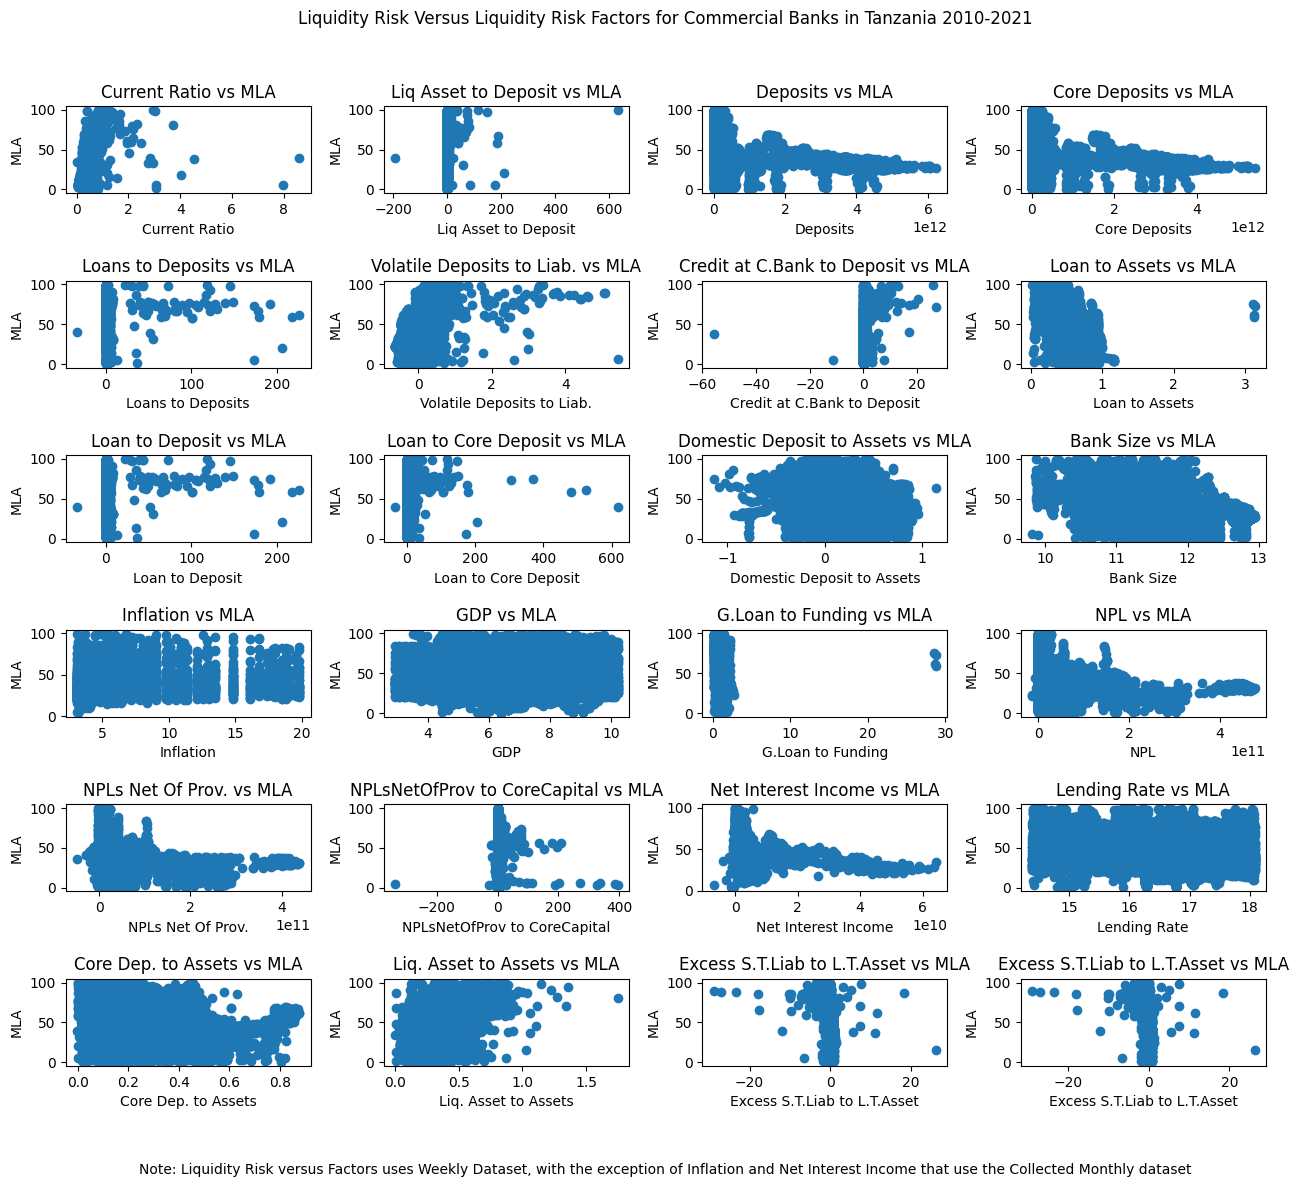

In [41]:
fig = plt.figure() 
fig, axes = plt.subplots(nrows = 6, ncols = 4, figsize=(15,12)) #, sharex=True, sharey = True)
fig.suptitle('Liquidity Risk Versus Liquidity Risk Factors for Commercial Banks in Tanzania 2010-2021')
ncol = 4
nrow = 6
activeCol = 0
mask = (df_new['MLA'] > 0) & (df_new['MLA'] < 100)
mask2 = (dataset['MLA'] > 0) & (dataset['MLA'] < 100)
for i in range(nrow):
    for j in range(ncol):
        #plt.subplot(ncol, nrow, activeCol)
        if listFactors[activeCol] == 'INFLATION':
            axes[i][j].scatter(dataset[mask2].loc[:,'INF'], dataset[mask2]['MLA'])
        elif listFactors[activeCol]=='NETINTERESTINCOME':
            axes[i][j].scatter(dataset[mask2].loc[:,'EWE_NetInterestIncome'], dataset[mask2]['MLA'])
        else:
            axes[i][j].scatter(df_new[mask].loc[:,listFactors[activeCol]], df_new[mask]['MLA'])
        axes[i][j].set(xlabel=listVarNames[activeCol], ylabel="MLA")
        axes[i][j].set_title(listVarNames[activeCol] + ' vs MLA')
        #axes[i][j].set_xlabel('Crosses', labelpad = 5)
        
        #axes[i][j].title(listVarNames[activeCol] + " vs MLA")
        #axes[i][j].xlabel(listVarNames[activeCol])
        #axes[i][j].ylabel('MLA')
        if activeCol + 1 < len(listFactors):
            activeCol=activeCol+1

#Add separate colourbar axes
#cbar_ax = f.add_axes([0.85, 0.15, 0.05, 0.7])

#Autoscale none
#fig.colorbar(axes[0][0], cax=cbar_ax)

footnote = "Note: Liquidity Risk versus Factors uses Weekly Dataset, with the exception of Inflation and Net Interest Income that use the Collected Monthly dataset"
plt.figtext(0.5, 0.01, footnote, ha="center")

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.3,
                    hspace=1.0)
plt.show()

/tmp/ipykernel_63/2131990713.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  axes[i][j].scatter(dataset[mask2].loc[:,'INF'], dataset[mask2]['MLA'])
/tmp/ipykernel_63/2131990713.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  axes[i][j].scatter(dataset[mask2].loc[:,'EWE_NetInterestIncome'], dataset[mask2]['MLA'])


<Figure size 640x480 with 0 Axes>

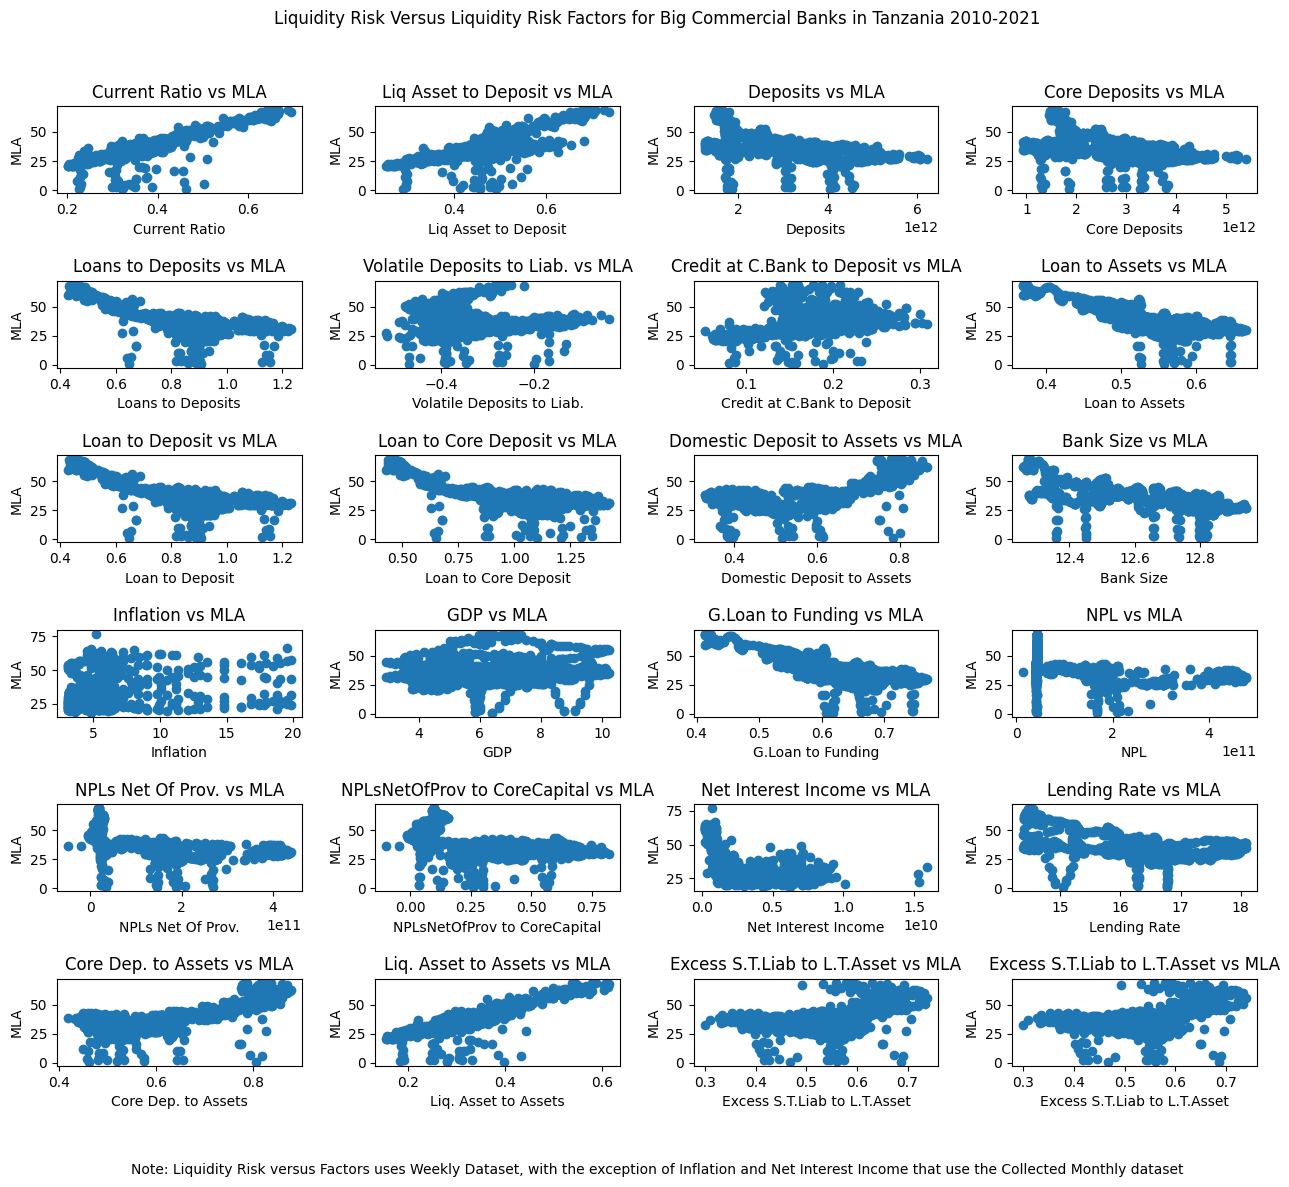

In [42]:
#B5015, B5912

fig = plt.figure() 
fig, axes = plt.subplots(nrows = 6, ncols = 4, figsize=(15,12)) #, sharex=True, sharey = True)
fig.suptitle('Liquidity Risk Versus Liquidity Risk Factors for Big Commercial Banks in Tanzania 2010-2021')
ncol = 4
nrow = 6
activeCol = 0
mask = (df_new['MLA'] > 0) & (df_new['MLA'] < 100) & ( (df_new['INSTITUTIONCODE']=='B5015') | (df_new['INSTITUTIONCODE']=='B5912'))
mask2 = (dataset['MLA'] > 0) & (dataset['MLA'] < 100) & ( (df_new['INSTITUTIONCODE']=='B5015') | (df_new['INSTITUTIONCODE']=='B5912'))
for i in range(nrow):
    for j in range(ncol):
        #plt.subplot(ncol, nrow, activeCol)
        if listFactors[activeCol] == 'INFLATION':
            axes[i][j].scatter(dataset[mask2].loc[:,'INF'], dataset[mask2]['MLA'])
        elif listFactors[activeCol]=='NETINTERESTINCOME':
            axes[i][j].scatter(dataset[mask2].loc[:,'EWE_NetInterestIncome'], dataset[mask2]['MLA'])
        else:
            axes[i][j].scatter(df_new[mask].loc[:,listFactors[activeCol]], df_new[mask]['MLA'])
        axes[i][j].set(xlabel=listVarNames[activeCol], ylabel="MLA")
        axes[i][j].set_title(listVarNames[activeCol] + ' vs MLA')
        #axes[i][j].set_xlabel('Crosses', labelpad = 5)
        
        #axes[i][j].title(listVarNames[activeCol] + " vs MLA")
        #axes[i][j].xlabel(listVarNames[activeCol])
        #axes[i][j].ylabel('MLA')
        if activeCol + 1 < len(listFactors):
            activeCol=activeCol+1

#Add separate colourbar axes
#cbar_ax = f.add_axes([0.85, 0.15, 0.05, 0.7])

#Autoscale none
#fig.colorbar(axes[0][0], cax=cbar_ax)

footnote = "Note: Liquidity Risk versus Factors uses Weekly Dataset, with the exception of Inflation and Net Interest Income that use the Collected Monthly dataset"
plt.figtext(0.5, 0.01, footnote, ha="center")

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.3,
                    hspace=1.0)
plt.show()

/tmp/ipykernel_63/3125122662.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  axes[i][j].scatter(dataset[mask2].loc[:,'INF'], dataset[mask2]['MLA'])
/tmp/ipykernel_63/3125122662.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  axes[i][j].scatter(dataset[mask2].loc[:,'EWE_NetInterestIncome'], dataset[mask2]['MLA'])


<Figure size 640x480 with 0 Axes>

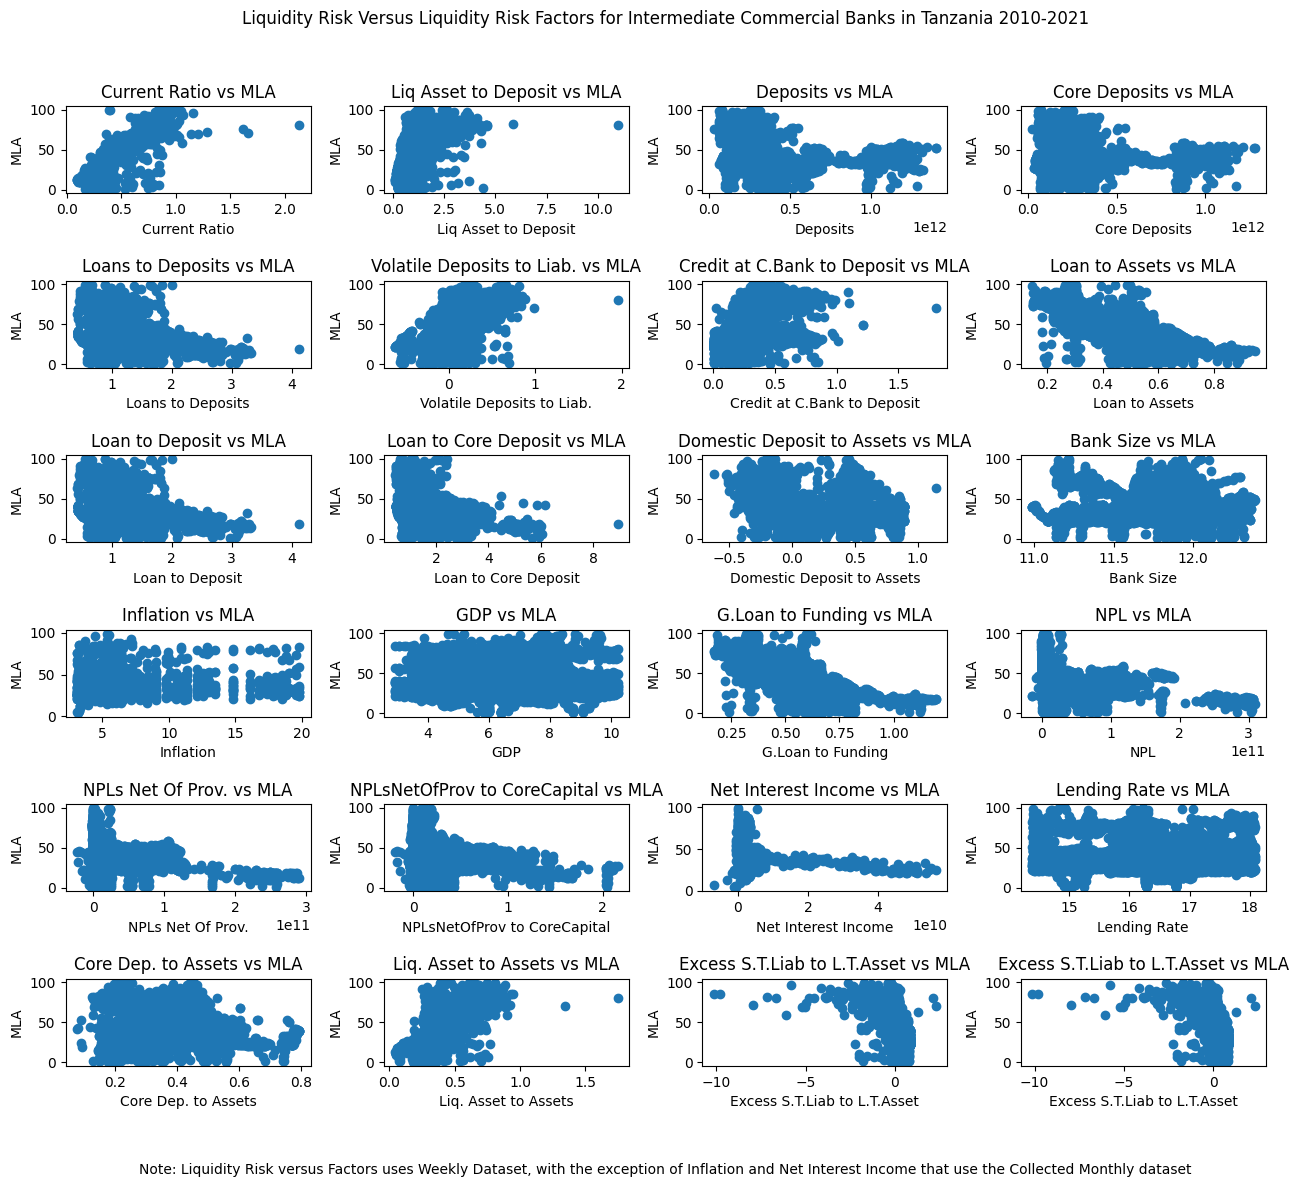

In [43]:
#intermediate banks
"""
B5412, B5512, B5213, B5413, B5613, B5014, B5914, B5115, 
B5515, B5815

"""

fig = plt.figure() 
fig, axes = plt.subplots(nrows = 6, ncols = 4, figsize=(15,12)) #, sharex=True, sharey = True)
fig.suptitle('Liquidity Risk Versus Liquidity Risk Factors for Intermediate Commercial Banks in Tanzania 2010-2021')
ncol = 4
nrow = 6
activeCol = 0
mask = (df_new['MLA'] > 0) & (df_new['MLA'] < 100) & (
    (df_new['INSTITUTIONCODE']=='B5412') | (df_new['INSTITUTIONCODE']=='B5512') |
    (df_new['INSTITUTIONCODE']=='B5213') | (df_new['INSTITUTIONCODE']=='B5413') |
    (df_new['INSTITUTIONCODE']=='B5613') | (df_new['INSTITUTIONCODE']=='B5014') |
    (df_new['INSTITUTIONCODE']=='B5914') | (df_new['INSTITUTIONCODE']=='B5115') |
    (df_new['INSTITUTIONCODE']=='B5515') | (df_new['INSTITUTIONCODE']=='B5815'))
mask2 = (dataset['MLA'] > 0) & (dataset['MLA'] < 100) & ( 
    (df_new['INSTITUTIONCODE']=='B5412') | (df_new['INSTITUTIONCODE']=='B5512') |
    (df_new['INSTITUTIONCODE']=='B5213') | (df_new['INSTITUTIONCODE']=='B5413') |
    (df_new['INSTITUTIONCODE']=='B5613') | (df_new['INSTITUTIONCODE']=='B5014') |
    (df_new['INSTITUTIONCODE']=='B5914') | (df_new['INSTITUTIONCODE']=='B5115') |
    (df_new['INSTITUTIONCODE']=='B5515') | (df_new['INSTITUTIONCODE']=='B5815')    )
for i in range(nrow):
    for j in range(ncol):
        #plt.subplot(ncol, nrow, activeCol)
        if listFactors[activeCol] == 'INFLATION':
            axes[i][j].scatter(dataset[mask2].loc[:,'INF'], dataset[mask2]['MLA'])
        elif listFactors[activeCol]=='NETINTERESTINCOME':
            axes[i][j].scatter(dataset[mask2].loc[:,'EWE_NetInterestIncome'], dataset[mask2]['MLA'])
        else:
            axes[i][j].scatter(df_new[mask].loc[:,listFactors[activeCol]], df_new[mask]['MLA'])
        axes[i][j].set(xlabel=listVarNames[activeCol], ylabel="MLA")
        axes[i][j].set_title(listVarNames[activeCol] + ' vs MLA')
        #axes[i][j].set_xlabel('Crosses', labelpad = 5)
        
        #axes[i][j].title(listVarNames[activeCol] + " vs MLA")
        #axes[i][j].xlabel(listVarNames[activeCol])
        #axes[i][j].ylabel('MLA')
        if activeCol + 1 < len(listFactors):
            activeCol=activeCol+1

#Add separate colourbar axes
#cbar_ax = f.add_axes([0.85, 0.15, 0.05, 0.7])

#Autoscale none
#fig.colorbar(axes[0][0], cax=cbar_ax)
footnote = "Note: Liquidity Risk versus Factors uses Weekly Dataset, with the exception of Inflation and Net Interest Income that use the Collected Monthly dataset"
plt.figtext(0.5, 0.01, footnote, ha="center")

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.3,
                    hspace=1.0)
plt.show()

/tmp/ipykernel_63/1256986282.py:42: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  axes[i][j].scatter(dataset[mask2].loc[:,'INF'], dataset[mask2]['MLA'])
/tmp/ipykernel_63/1256986282.py:44: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  axes[i][j].scatter(dataset[mask2].loc[:,'EWE_NetInterestIncome'], dataset[mask2]['MLA'])


<Figure size 640x480 with 0 Axes>

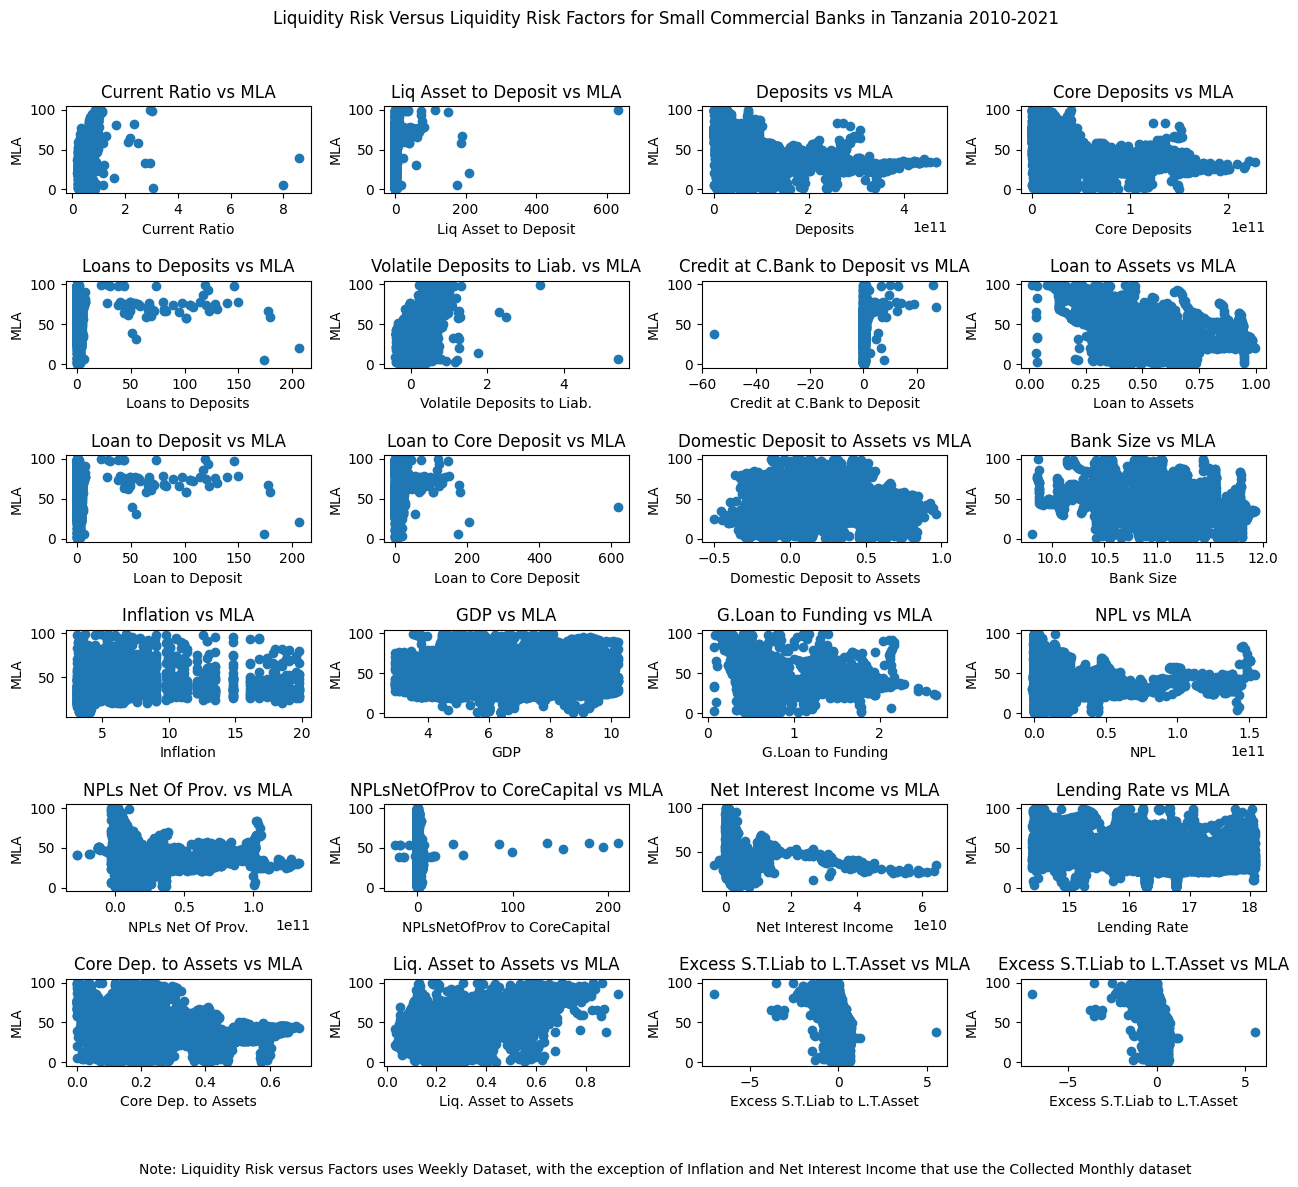

In [44]:
#small banks
"""
B5812, B5813, B5913, B5114, B5814, B5215, B5016, B5116, 
B5716, B5117, B5417, B5717, B5917, B5018, B5318, B5418, 
B5619, B5719, B5919, B5120
"""

fig = plt.figure() 
fig, axes = plt.subplots(nrows = 6, ncols = 4, figsize=(15,12)) #, sharex=True, sharey = True)
fig.suptitle('Liquidity Risk Versus Liquidity Risk Factors for Small Commercial Banks in Tanzania 2010-2021')
ncol = 4
nrow = 6
activeCol = 0
mask = (df_new['MLA'] > 0) & (df_new['MLA'] < 100) & (
    (df_new['INSTITUTIONCODE']=='B5812') | (df_new['INSTITUTIONCODE']=='B5813') |
    (df_new['INSTITUTIONCODE']=='B5913') | (df_new['INSTITUTIONCODE']=='B5114') |
    (df_new['INSTITUTIONCODE']=='B5814') | (df_new['INSTITUTIONCODE']=='B5215') |
    (df_new['INSTITUTIONCODE']=='B5016') | (df_new['INSTITUTIONCODE']=='B5116') |
    (df_new['INSTITUTIONCODE']=='B5716') | (df_new['INSTITUTIONCODE']=='B5117') |

    (df_new['INSTITUTIONCODE']=='B5417') | (df_new['INSTITUTIONCODE']=='B5717') |
    (df_new['INSTITUTIONCODE']=='B5917') | (df_new['INSTITUTIONCODE']=='B5018') |
    (df_new['INSTITUTIONCODE']=='B5318') | (df_new['INSTITUTIONCODE']=='B5418') |
    (df_new['INSTITUTIONCODE']=='B5619') | (df_new['INSTITUTIONCODE']=='B5719') |
    (df_new['INSTITUTIONCODE']=='B5919') | (df_new['INSTITUTIONCODE']=='B5120') )
mask2 = (dataset['MLA'] > 0) & (dataset['MLA'] < 100) & ( 
    (df_new['INSTITUTIONCODE']=='B5812') | (df_new['INSTITUTIONCODE']=='B5813') |
    (df_new['INSTITUTIONCODE']=='B5913') | (df_new['INSTITUTIONCODE']=='B5114') |
    (df_new['INSTITUTIONCODE']=='B5814') | (df_new['INSTITUTIONCODE']=='B5215') |
    (df_new['INSTITUTIONCODE']=='B5016') | (df_new['INSTITUTIONCODE']=='B5116') |
    (df_new['INSTITUTIONCODE']=='B5716') | (df_new['INSTITUTIONCODE']=='B5117') |

    (df_new['INSTITUTIONCODE']=='B5417') | (df_new['INSTITUTIONCODE']=='B5717') |
    (df_new['INSTITUTIONCODE']=='B5917') | (df_new['INSTITUTIONCODE']=='B5018') |
    (df_new['INSTITUTIONCODE']=='B5318') | (df_new['INSTITUTIONCODE']=='B5418') |
    (df_new['INSTITUTIONCODE']=='B5619') | (df_new['INSTITUTIONCODE']=='B5719') |
    (df_new['INSTITUTIONCODE']=='B5919') | (df_new['INSTITUTIONCODE']=='B5120') )  
for i in range(nrow):
    for j in range(ncol):
        #plt.subplot(ncol, nrow, activeCol)
        if listFactors[activeCol] == 'INFLATION':
            axes[i][j].scatter(dataset[mask2].loc[:,'INF'], dataset[mask2]['MLA'])
        elif listFactors[activeCol]=='NETINTERESTINCOME':
            axes[i][j].scatter(dataset[mask2].loc[:,'EWE_NetInterestIncome'], dataset[mask2]['MLA'])
        else:
            axes[i][j].scatter(df_new[mask].loc[:,listFactors[activeCol]], df_new[mask]['MLA'])
        axes[i][j].set(xlabel=listVarNames[activeCol], ylabel="MLA")
        axes[i][j].set_title(listVarNames[activeCol] + ' vs MLA')
        #axes[i][j].set_xlabel('Crosses', labelpad = 5)
        
        #axes[i][j].title(listVarNames[activeCol] + " vs MLA")
        #axes[i][j].xlabel(listVarNames[activeCol])
        #axes[i][j].ylabel('MLA')
        if activeCol + 1 < len(listFactors):
            activeCol=activeCol+1

#Add separate colourbar axes
#cbar_ax = f.add_axes([0.85, 0.15, 0.05, 0.7])

#Autoscale none
#fig.colorbar(axes[0][0], cax=cbar_ax)
footnote = "Note: Liquidity Risk versus Factors uses Weekly Dataset, with the exception of Inflation and Net Interest Income that use the Collected Monthly dataset"
plt.figtext(0.5, 0.01, footnote, ha="center")

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.3,
                    hspace=1.0)
plt.show()

In [45]:
df_new[['XX_MLA_CLASS2','01_CURR_ACC']].corr(method='pearson', min_periods=1)

XX_MLA_CLASS2  01_CURR_ACC
XX_MLA_CLASS2       1.000000     0.064914
01_CURR_ACC         0.064914     1.000000

#### Features Selection

##### (1) Test Multi-Collinearity and Features Correlation with Label

<AxesSubplot:>

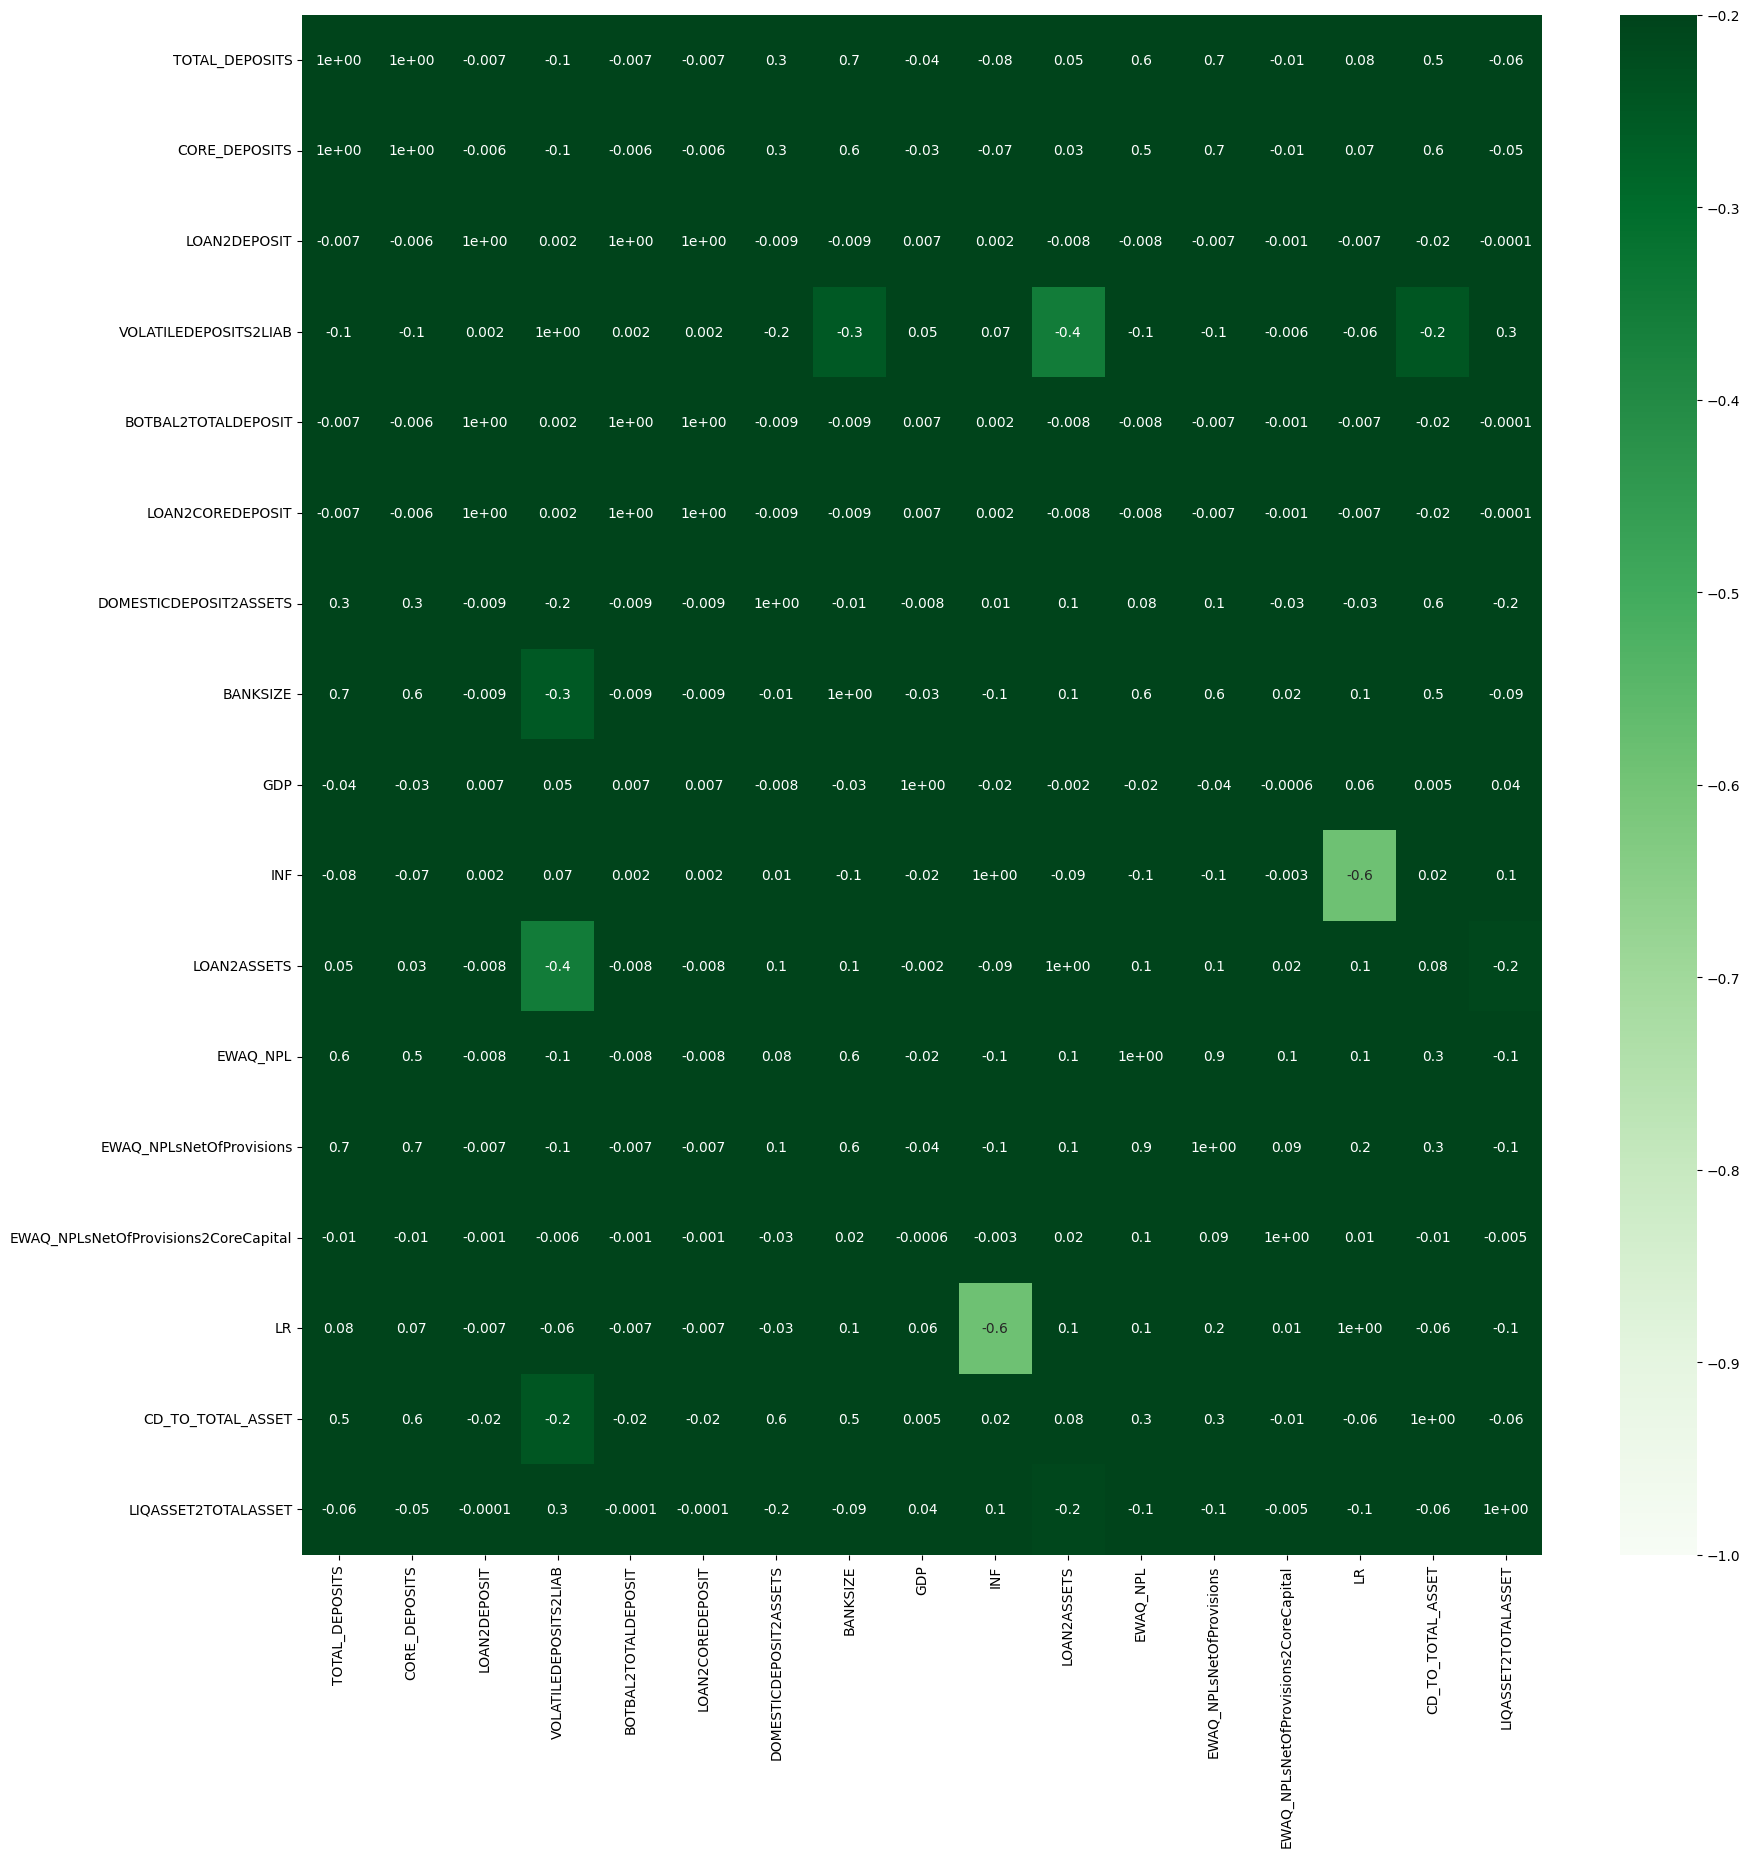

In [46]:
#.corr()
plt.figure(figsize=(20,20))
sns.heatmap(df_factors.iloc[:,2:-1].corr(),annot=True, vmin = -1, vmax=-0.2, cmap="Greens", fmt='0.1')



In [47]:
#### Feature selection 
listVar = ['01_CURR_ACC',
'02_TIME_DEPOSIT',
'03_SAVINGS',
'05_BANKS_DEPOSITS',
'06_BORROWING_FROM_PUBLIC',
'07_INTERBANKS_LOAN_PAYABLE',
'08_CHEQUES_ISSUED',
'09_PAY_ORDERS',
'10_FOREIGN_DEPOSITS_AND_BORROWINGS',
'11_OFF_BALSHEET_COMMITMENTS',
'13_CASH',
'14_CURRENT_ACC',
'15_SMR_ACC',
'19_BANKS_ABROAD',
'21_INTERBANK_LOANS',
'22_TREASURY_BILLS',
'24_FOREIGN_CURRENCY',
'XX_CUSTOMER_DEPOSITS',
'XX_TOTAL_LIQUID_ASSET',
'XX_BOT_BALANCE',
'XX_BAL_IN_OTHER_BANKS',
'F077_ASSETS_TOTAL',
'F125_LIAB_TOTAL',
'EWAQ_GrossLoans',
'EWAQ_Capital',
'MLA_CLASS2', #
'TOTAL_DEPOSITS'
]

colsAll = []
for i in range(len(listVar)):
    cols = [col for col in   df_new.columns if  listVar[i] in col]
    colsAll.append(cols)
print(colsAll)

[['01_CURR_ACC'], ['02_TIME_DEPOSIT'], ['03_SAVINGS'], ['05_BANKS_DEPOSITS'], ['06_BORROWING_FROM_PUBLIC'], ['07_INTERBANKS_LOAN_PAYABLE'], ['08_CHEQUES_ISSUED'], ['09_PAY_ORDERS'], ['10_FOREIGN_DEPOSITS_AND_BORROWINGS'], ['11_OFF_BALSHEET_COMMITMENTS'], ['13_CASH'], ['14_CURRENT_ACC'], ['15_SMR_ACC'], ['19_BANKS_ABROAD'], ['21_INTERBANK_LOANS'], ['22_TREASURY_BILLS'], ['24_FOREIGN_CURRENCY'], ['XX_CUSTOMER_DEPOSITS'], ['XX_TOTAL_LIQUID_ASSET'], ['XX_BOT_BALANCE'], ['XX_BAL_IN_OTHER_BANKS'], ['F077_ASSETS_TOTAL'], ['F125_LIAB_TOTAL'], ['EWAQ_GrossLoans'], ['EWAQ_Capital'], ['MLA_CLASS2', 'XX_MLA_CLASS2'], ['TOTAL_DEPOSITS', 'GL_TO_TOTAL_DEPOSITS']]


In [48]:
#X = df_new[['x1','x2','x3','x4','x5','x6','x7','x8','x9','EWL_LIQUIDITY RATING']]
"""
scaled_X = df_new[['EWL_LIQASSET_TOTAL',
'EWL_LIQLIAB_TOTAL',
'EWL_09. TOTAL DEPOSITS',

'EWL_LIQLIAB_TIMEDEPOSIT',
'EWL_Gross Loans to Total Deposits ',
'F077_ASSETS_TOTAL',
'F002_ASSET_BAL_BOT',
'LR',
'x7',
'x11']]

Y = df_new[['EWL_LIQUIDITY RATING']]
"""

"\nscaled_X = df_new[['EWL_LIQASSET_TOTAL',\n'EWL_LIQLIAB_TOTAL',\n'EWL_09. TOTAL DEPOSITS',\n\n'EWL_LIQLIAB_TIMEDEPOSIT',\n'EWL_Gross Loans to Total Deposits ',\n'F077_ASSETS_TOTAL',\n'F002_ASSET_BAL_BOT',\n'LR',\n'x7',\n'x11']]\n\nY = df_new[['EWL_LIQUIDITY RATING']]\n"

In [49]:
df_new.columns

Index(['REPORTINGDATE', 'INSTITUTIONCODE', '01_CURR_ACC', '02_TIME_DEPOSIT',
       '03_SAVINGS', '04_OTHER_DEPOSITS', '05_BANKS_DEPOSITS',
       '06_BORROWING_FROM_PUBLIC', '07_INTERBANKS_LOAN_PAYABLE',
       '08_CHEQUES_ISSUED', '09_PAY_ORDERS',
       '10_FOREIGN_DEPOSITS_AND_BORROWINGS', '11_OFF_BALSHEET_COMMITMENTS',
       '12_OTHER_LIABILITIES', '13_CASH', '14_CURRENT_ACC', '15_SMR_ACC',
       '16_FOREIGN CURRENCY', '17_OTHER DEPOSITS', '18_BANKS_TZ',
       '19_BANKS_ABROAD', '20_CHEQUES_ITEMS_FOR_CLEARING',
       '21_INTERBANK_LOANS', '22_TREASURY_BILLS', '23_OTHER_GOV_SECURITIES',
       '24_FOREIGN_CURRENCY', '25_COMMERCIAL_BILLS', '26_PROMISSORY_NOTES',
       'XX_CUSTOMER_DEPOSITS', 'XX_TOTAL_LIQUID_LIAB', 'XX_BOT_BALANCE',
       'XX_BAL_IN_OTHER_BANKS', 'XX_TOTAL_LIQUID_ASSET', 'XX_MLA',
       'F077_ASSETS_TOTAL', 'F125_LIAB_TOTAL', 'EWAQ_GrossLoans',
       'EWAQ_Capital', 'EWAQ_NPL', 'EWAQ_NPLsNetOfProvisions',
       'EWAQ_NPLsNetOfProvisions2CoreCapital', 'LR', 

In [50]:
#X = df_new[['x1','x2','x3','x4','x5','x6','x7','x8','x9']]
""""
(1) The features below worked for a bank B5015 and gave accuracy between 0.5 to 0.62 depending on tuning, problem was uniform accuracy
    and uniform loss bank accuracy 0.62 wit 88 records
scaled_X = df_new[['EWL_LIQASSET_TOTAL',
'EWL_LIQLIAB_TOTAL',
'EWL_09. TOTAL DEPOSITS',
'EWL_LIQLIAB_TIMEDEPOSIT',
'EWL_Gross Loans to Total Deposits ',
'F077_ASSETS_TOTAL',
'F002_ASSET_BAL_BOT',
'LR']]
Y = df_new[['EWL_LIQUIDITY RATING']]

"""
listInst = ['B5015','B5115','B5114']

mask = ( #(df_new['INSTITUTIONCODE'] == 'B5014') |   #
        # (df_new['INSTITUTIONCODE'] == 'B5015')   #|   #acc 1.0  
         # (df_new['INSTITUTIONCODE'] == 'B5115')  |   #acc 0.75 
          # (df_new['INSTITUTIONCODE'] == 'B5015') 
          ( df_new['INSTITUTIONCODE'] == df_new['INSTITUTIONCODE'])
         #(df_new['INSTITUTIONCODE'] == 'B5919')     #
        #(df_new['INSTITUTIONCODE'] == 'B5213')
        ) 

"""
scaled_X = df_new[mask][['EWL_LIQASSET_TOTAL',
'EWL_LIQLIAB_TOTAL',
'EWL_09. TOTAL DEPOSITS',
'EWL_LIQLIAB_TIMEDEPOSIT',
'EWL_Gross Loans to Total Deposits ',
'F077_ASSETS_TOTAL',
'F002_ASSET_BAL_BOT',
'LR']]
"""
"""
scaled_X = df_new[mask][['01_CURR_ACC',
'02_TIME_DEPOSIT',
'03_SAVINGS',
'05_BANKS_DEPOSITS',
'06_BORROWING_FROM_PUBLIC',
'07_INTERBANKS_LOAN_PAYABLE',
'08_CHEQUES_ISSUED',
'09_PAY_ORDERS',
'10_FOREIGN_DEPOSITS_AND_BORROWINGS',
'11_OFF_BALSHEET_COMMITMENTS',
'13_CASH',
'14_CURRENT_ACC',
'15_SMR_ACC',
'19_BANKS_ABROAD',
'21_INTERBANK_LOANS',
'22_TREASURY_BILLS',
'24_FOREIGN_CURRENCY',
'XX_CUSTOMER_DEPOSITS',
'XX_TOTAL_LIQUID_ASSET',
'XX_BOT_BALANCE',
'XX_BAL_IN_OTHER_BANKS',
'F077_ASSETS_TOTAL',
'F125_LIAB_TOTAL',
'EWAQ_GrossLoans',
'EWAQ_Capital']]
"""



"""
scaled_X = df_new[mask][[
#'02_TIME_DEPOSIT',
#'03_SAVINGS','
#'INSTITUTIONCODE',
'XX_TOTAL_LIQUID_ASSET',
'F125_LIAB_TOTAL',
'XX_CUSTOMER_DEPOSITS',
'05_BANKS_DEPOSITS',
'02_TIME_DEPOSIT',
'03_SAVINGS',
'22_TREASURY_BILLS',
'EWAQ_GrossLoans',
'EWAQ_Capital',
'F077_ASSETS_TOTAL',
'F125_LIAB_TOTAL',
'LR',
'06_BORROWING_FROM_PUBLIC',
'07_INTERBANKS_LOAN_PAYABLE',
'19_BANKS_ABROAD',
'EWAQ_NPLsNetOfProvisions',  #significant contribution
'GDP', #little contribution
'EWAQ_NPLsNetOfProvisions2CoreCapital', #little contribution
#'EWAQ_NPL'  poor contribution
#'XX_BAL_IN_OTHER_BANKS' poor contribution
'XX_BOT_BALANCE', #significant contribution
'21_INTERBANK_LOANS',
'GL_TO_TOTAL_FUNDING', #not very significant accuracy boost
'CD_TO_TOTAL_FUNDING',  #significant accuracy boost
#'LiqAsset2DemandLiab',
'ExcessShortTLiab2LongTAsset',
#'CD_TO_TOTAL_ASSET'
#'GL_TO_TOTAL_DEPOSITS'  #insignificant impact, reduction in accuracy, has high correlation with LiqAsset2DemLiab(-0.9)
'LIQASSET2TOTALASSET'
]]
"""

scaled_X = df_new[mask][[
#'02_TIME_DEPOSIT',
#'03_SAVINGS','
#'INSTITUTIONCODE',
##'XX_TOTAL_LIQUID_ASSET',
##'F125_LIAB_TOTAL',
##'XX_CUSTOMER_DEPOSITS',
##'05_BANKS_DEPOSITS',
##'02_TIME_DEPOSIT',
##'03_SAVINGS',
##'22_TREASURY_BILLS',
##'EWAQ_GrossLoans',
##'EWAQ_Capital',
'BANKSIZE', 
#'F077_ASSETS_TOTAL',
##'F125_LIAB_TOTAL',
'LR',
##'06_BORROWING_FROM_PUBLIC',
##'07_INTERBANKS_LOAN_PAYABLE',
##'19_BANKS_ABROAD',
'EWAQ_NPLsNetOfProvisions',  #significant contribution
'GDP', #little contribution
'EWAQ_NPLsNetOfProvisions2CoreCapital', #little contribution
#'EWAQ_NPL'  poor contribution
#'XX_BAL_IN_OTHER_BANKS' poor contribution
#'XX_BOT_BALANCE', #significant contribution
##'21_INTERBANK_LOANS',
#'GL_TO_TOTAL_FUNDING', #not very significant accuracy boost
#'CD_TO_TOTAL_FUNDING',  #significant accuracy boost   #total funding includes loans, other than just deposit
##'LiqAsset2DemandLiab',
'ExcessShortTLiab2LongTAsset',
'CD_TO_TOTAL_ASSET',
#'GL_TO_TOTAL_DEPOSITS'  #insignificant impact, reduction in accuracy, has high correlation with LiqAsset2DemLiab(-0.9)
'LIQASSET2TOTALASSET',
#'LOAN2DEPOSIT' #,   
'LIQASSET2DEPOSIT', #RWEY
'TOTAL_DEPOSITS'
]]
#Y = df_new[mask][['EWL_LIQUIDITY RATING']]
#Y = df_new[mask][['EWL_LIQUIDITY RATING']]
Y = df_new[mask][['XX_MLA_CLASS2']]


In [51]:
# df_tmp_results

In [52]:
factors = pd.concat([scaled_X, Y], axis = 1)
factors.columns

Index(['BANKSIZE', 'LR', 'EWAQ_NPLsNetOfProvisions', 'GDP',
       'EWAQ_NPLsNetOfProvisions2CoreCapital', 'ExcessShortTLiab2LongTAsset',
       'CD_TO_TOTAL_ASSET', 'LIQASSET2TOTALASSET', 'LIQASSET2DEPOSIT',
       'TOTAL_DEPOSITS', 'XX_MLA_CLASS2'],
      dtype='object')

In [53]:

#.corr()
plt.figure(figsize=(20,20))
#sns.heatmap(factors.corr(),annot=True, vmin = -1, vmax=-0.2, cmap="Greens", fmt='0.1')

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

In [54]:
scaled_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20878 entries, 0 to 20877
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   BANKSIZE                              20878 non-null  float64
 1   LR                                    20878 non-null  float64
 2   EWAQ_NPLsNetOfProvisions              20878 non-null  float64
 3   GDP                                   20878 non-null  float64
 4   EWAQ_NPLsNetOfProvisions2CoreCapital  20878 non-null  float64
 5   ExcessShortTLiab2LongTAsset           20878 non-null  float64
 6   CD_TO_TOTAL_ASSET                     20878 non-null  float64
 7   LIQASSET2TOTALASSET                   20878 non-null  float64
 8   LIQASSET2DEPOSIT                      20878 non-null  float64
 9   TOTAL_DEPOSITS                        20878 non-null  float64
dtypes: float64(10)
memory usage: 1.8 MB


In [55]:
df_new.shape

(20878, 69)

In [56]:
df_new[mask].head()

REPORTINGDATE INSTITUTIONCODE   01_CURR_ACC  02_TIME_DEPOSIT    03_SAVINGS  \
0    2010-02-05           B5014  4.358491e+10     7.636494e+09  1.834680e+10   
1    2010-02-12           B5014  4.198509e+10     7.603740e+09  1.827224e+10   
2    2010-02-19           B5014  4.139788e+10     7.647355e+09  1.785701e+10   
3    2010-02-26           B5014  4.083612e+10     8.152346e+09  1.859316e+10   
4    2010-03-05           B5014  4.533415e+10     8.091856e+09  1.862976e+10   

   04_OTHER_DEPOSITS  05_BANKS_DEPOSITS  06_BORROWING_FROM_PUBLIC  \
0         1052155.45                0.0                       0.0   
1         1052155.45                0.0                       0.0   
2         1052155.45                0.0                       0.0   
3         1052155.45                0.0                       0.0   
4         1052155.45                0.0                       0.0   

   07_INTERBANKS_LOAN_PAYABLE  08_CHEQUES_ISSUED  ...  LIQASSET2TOTALASSET  \
0                1.486844e+09       7.642781e+07  ...             0.537186   
1                1.669462e+09       8.905947e+07  ...             0.547733   
2                1.839116e+09       1.335379e+08  ...             0.552115   
3                1.850474e+09       1.217606e+08  ...             0.550894   
4                1.843065e+09       1.099271e+08  ...             0.535509   

    BANKSIZE  LOAN2DEPOSIT  LIQASSET2DEPOSIT  CURRENTRATIO  \
0  11.137502      0.584835          1.059766      0.868981   
1  11.129058      0.607354          1.086425      0.895453   
2  11.125597      0.621610          1.101995      0.909970   
3  11.126559      0.618840          1.090917      0.835802   
4  11.138860      0.582500          1.023180      0.809051   

   VOLATILEDEPOSITS2LIAB  LOAN2ASSETS  DOMESTICDEPOSIT2ASSETS  \
0               0.097397     0.296448                0.533398   
1               0.113674     0.306205                0.533440   
2               0.123265     0.311436                0.531216   
3               0.121535     0.312504                0.503051   
4               0.080494     0.304868                0.514930   

   LOAN2COREDEPOSIT  BOTBAL2TOTALDEPOSIT  
0          0.656947             0.230989  
1          0.683994             0.236800  
2          0.701833             0.240194  
3          0.703730             0.237779  
4          0.656189             0.223015  

[5 rows x 69 columns]

##### Correlation Analysis by Clusters (Big, Intermediate Banks, Small Banks)


#### Ranking features based on importance

In [57]:
df_factors = df_new.rename(columns={"CURRENTRATIO": "X1", 
                           "LIQASSET2DEPOSIT": "X2",
                           "TOTAL_DEPOSITS": "X3",
                           "CORE_DEPOSITS": "X4",
                           "LOAN2DEPOSIT": "X5",
                           "VOLATILEDEPOSITS2LIAB": "X6",
                           "BOTBAL2TOTALDEPOSIT": "X7",
                           "LOAN2COREDEPOSIT": "X10",
                           "DOMESTICDEPOSIT2ASSETS": "X11",
                           "BANKSIZE": "X12",
                           "GDP": "X14",
                           "LOAN2ASSETS": "X15",
                           "EWAQ_NPL": "X16",
                           "EWAQ_NPLsNetOfProvisions": "X17",
                           "EWAQ_NPLsNetOfProvisions2CoreCapital": "X18",
                           "LR": "X20",
                           "CD_TO_TOTAL_ASSET": "X21",
                           "LIQASSET2TOTALASSET": "X22",
                           "ExcessShortTLiab2LongTAsset": "X23",
                           "XX_MLA_CLASS2": "Y"}, errors="raise")

In [58]:
# Train a classifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1)
clf.fit(df_factors[['X1', 
                    'X2',
                    'X3',
                    'X4',
                    'X5',
                    'X6',
                    'X7',
                    'X10',
                    'X11',
                    'X12',
                    'X14',
                    'X15',
                    'X16',
                    'X17',
                    'X18',
                    'X20',
                    'X21',
                    'X22',
                    'X23']].values, 
        df_factors['Y'].values)

# Index sort the most important features
sorted_feature_weight_idxes = np.argsort(clf.feature_importances_)[::-1] # Reverse sort

# Get the most important features names and weights

most_important_features = np.take_along_axis(
    np.array(df_factors[['X1', 
                    'X2',
                    'X3',
                    'X4',
                    'X5',
                    'X6',
                    'X7',
                    'X10',
                    'X11',
                    'X12',
                    'X14',
                    'X15',
                    'X16',
                    'X17',
                    'X18',
                    'X20',
                    'X21',
                    'X22',
                    'X23','Y']].iloc[:, 1:20].columns.tolist()), 
    sorted_feature_weight_idxes, axis=0)
most_important_weights = np.take_along_axis(
    np.array(clf.feature_importances_), 
    sorted_feature_weight_idxes, axis=0)

# Show
list(zip(most_important_features, most_important_weights))

# [('Feature1', 0.59), ('Feature2', 0.41)]
#source:https://gist.github.com/YousefGh/f6c42d5384cb53ac159082415fe43faa#file-kmeans_interp11-py

[('X2', 0.5578376676659657),
 ('X23', 0.14479368944315926),
 ('X7', 0.05900583947726336),
 ('X3', 0.045830859442296125),
 ('X16', 0.03753289202059246),
 ('Y', 0.022350219289516905),
 ('X4', 0.01805871738544654),
 ('X14', 0.016968433801312275),
 ('X6', 0.016299314354381297),
 ('X12', 0.012654024391485927),
 ('X17', 0.011514734463432213),
 ('X5', 0.011175163993999426),
 ('X18', 0.009155864852698072),
 ('X11', 0.008953373188640886),
 ('X10', 0.00806547655443808),
 ('X22', 0.006695026053723216),
 ('X20', 0.005966556813980872),
 ('X21', 0.004847671212219881),
 ('X15', 0.0022944755954475717)]

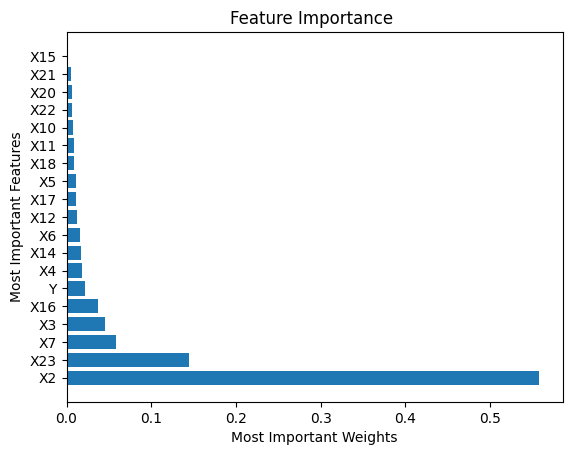

In [59]:
import matplotlib.pyplot as plt
plt.barh(most_important_features, most_important_weights)
plt.xlabel('Most Important Weights')
plt.ylabel('Most Important Features')
plt.title('Feature Importance ')
plt.show()

#### Confirmation of features 

In [ ]:
#fig, ax = plt.subplots()
#fig.suptitle('A single ax with no data')
#fig, axes = plt.subplots(2, 2)
#fig.suptitle('2 row x 2 columns axes with no dat')
#fig, ax = plt.subplots(2, 2)
fig, axes = plt.subplots(2, 4, sharex=True, figsize=(14,7))
fig.suptitle('Benchmarking Bank B5916 with Industry Prior to its Failure in August 2018')
#axes[0].set_title('Title of the first chart')

#sns.barplot(ax=axes[0], x=bulbasaur.index, y=bulbasaur.values)
#axes[0].set_title(bulbasaur.name)
df_new['Core Dep./Dep.'] = df_new['CD_TO_TOTAL_DEPOSIT']
df_new['Net NPLs'] = df_new['EWAQ_NPLsNetOfProvisions']
df_new['Liq. Assets/Assets'] = df_new['LIQASSET2TOTALASSET']
df_new['Liq. Assets/Deposits'] = df_new['LIQASSET2DEPOSIT']
df_new['Net NPLs/Core Cap.'] = df_new['EWAQ_NPLsNetOfProvisions2CoreCapital']
df_new['GL/Deposits'] = df_new['GL_TO_TOTAL_DEPOSITS']
mask_bankM = (df_new['INSTITUTIONCODE']=='B5916')
sns.lineplot(ax=axes[0,0], x=df_new['REPORTINGDATE'],y=df_new['Core Dep./Dep.'],label="TZ Banks", color='b')
sns.lineplot(ax=axes[0,0], x=df_new[mask_bankM]['REPORTINGDATE'],y=df_new[mask_bankM]['Core Dep./Dep.'], label="Bank B5916", color='r')
axes[0,0].set_title('Core Deposits to Deposits')
#axes[0,0].set_ylabels('Core Deposits/Total Assets', size = 12)

sns.lineplot(ax=axes[0,1],x=df_new['REPORTINGDATE'],y=df_new['Net NPLs'],label="TZ Banks",color='b')
sns.lineplot(ax=axes[0,1],x=df_new[mask_bankM]['REPORTINGDATE'],y=df_new[mask_bankM]['Net NPLs'], label="Bank B5916", color='r')
axes[0,1].axhline(0.05, color='r', linestyle='--')
axes[0,1].set_title('Net NPLs')
#axes[0,1].set_ylabels('Net NPLs', size = 12)
sns.lineplot(ax=axes[0,2], x=df_new[df_new['LIQASSET2TOTALASSET']<1.5]['REPORTINGDATE'],y=df_new[df_new['Liq. Assets/Assets']<1.5]['Liq. Assets/Assets'],label="TZ Banks",color='b')
sns.lineplot(ax=axes[0,2], x=df_new[mask_bankM]['REPORTINGDATE'],y=df_new[mask_bankM]['Liq. Assets/Assets'], label="Bank B5916", color='r')
axes[0,2].set_title('Liquid Assets to Assets')
#axes[1,0].set_ylabels('Liquid Assets/Assets', size = 12)
mask_all = (df_new['LIQASSET2DEPOSIT']> -2) & (df_new['LIQASSET2DEPOSIT']<2)
sns.lineplot(ax=axes[0,3],x=df_new[mask_all]['REPORTINGDATE'],y=df_new[mask_all]['Liq. Assets/Deposits'],label="TZ Banks",color='b')
sns.lineplot(ax=axes[0,3],x=df_new[mask_bankM]['REPORTINGDATE'],y=df_new[mask_bankM]['Liq. Assets/Deposits'], label="Bank B5916", color='r')
axes[0,3].set_title('Liquid Assets to Deposits')
#axes[1,1].set_ylabels('Liquid Assets/Deposits', size = 12)
sns.lineplot(ax=axes[1,0],x=df_new['REPORTINGDATE'],y=df_new['Net NPLs/Core Cap.'],label="TZ Banks", color='b')
sns.lineplot(ax=axes[1,0],x=df_new[mask_bankM]['REPORTINGDATE'],y=df_new[mask_bankM]['Net NPLs/Core Cap.'], label="Bank B5916", color='r')
axes[1,0].set_title('Net NPLs to Core Capital')
#axes[2,0].set_ylabels('Net NPLs/Core Capital', size = 12)
sns.lineplot(ax=axes[1,1],x=df_new['REPORTINGDATE'],y=df_new['MLA'],label="TZ Banks", color='b')
sns.lineplot(ax=axes[1,1],x=df_new[mask_bankM]['REPORTINGDATE'],y=df_new[mask_bankM]['MLA'], label="Bank B5916", color='r')
axes[1,1].axhline(20, color='r', linestyle='--')
axes[1,1].set_title('MLA')

mask_bankM = (df_new['INSTITUTIONCODE']=='B5916')
mask = ((df_new['GL_TO_TOTAL_DEPOSITS']>-3) & (df_new['GL_TO_TOTAL_DEPOSITS']<3))
sns.lineplot(ax=axes[1,2],x=df_new['REPORTINGDATE'],y=df_new[mask]['GL/Deposits'],label="Banks in TZ", color='b')
sns.lineplot(ax=axes[1,2],x=df_new[mask_bankM]['REPORTINGDATE'],y=df_new[mask_bankM][mask]['GL/Deposits'], label="Bank B5916", color='r')
axes[1,2].axhline(0.80, color='r', linestyle='--')
axes[1,2].set_title('Gross Loans to Deposits')

mask1  = ((df_new['INSTITUTIONCODE']=='B5916')&(df_new['REPORTINGDATE']<='25-FEB-2017'))
mask2  = ((df_new['INSTITUTIONCODE']=='B5916')&(df_new['REPORTINGDATE']>'25-FEB-2017'))
sns.lineplot(ax=axes[1,3],x=df_new[mask1]['REPORTINGDATE'],y=df_new[mask1]['MLA'], label="Negative Liquidity Risk",color = 'b')
sns.lineplot(ax=axes[1,3],x=df_new[mask2]['REPORTINGDATE'],y=df_new[mask2]['MLA'], label="Positive Liquidity Risk",color='r')
axes[1,3].axhline(20, color='r', linestyle='--')
axes[1,3].set_title('MLA trends')
#axes[2,1].set_ylabels('MLA', size = 12)
#fig.text(0.5, 0.04, 'Reporting Date', ha='center')
#fig.text(0.04, 0.5, 'common Y', va='center', rotation='vertical')

footnote = "Note: Bank B5916 had a seemingly good MLA 3 years prior to its failure but practically was under Liquidity Risk which is revealed by poor performanc in Liquidity Risk factors"
plt.figtext(0.5, 0.01, footnote, ha="center")
# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4)

# Add space between the title and the plots
plt.tight_layout()

plt.plot()



In [ ]:
#LOAN TO DEPOSIT
mask_bankM = (df_new['INSTITUTIONCODE']=='B5916')
mask = ((df_new['GL_TO_TOTAL_DEPOSITS']>-3) & (df_new['GL_TO_TOTAL_DEPOSITS']<3))
sns.lineplot(x=df_new['REPORTINGDATE'],y=df_new[mask]['GL_TO_TOTAL_DEPOSITS'],label="Commercial Banks in TZ", color='b')
sns.lineplot(x=df_new[mask_bankM]['REPORTINGDATE'],y=df_new[mask_bankM][mask]['GL_TO_TOTAL_DEPOSITS'], label="Bank B5916", color='r')
#plt.axhline(20, color='r', linestyle='--')
plt.title('Benchmarking Gross Loan to Deposit in Bank B5916 prior to failure')
plt.ylabel('Gloss Loan to Total Deposits')
plt.xlabel('Reporting Periods')
plt.legend()
plt.show()

In [ ]:
#CD_TO_TOTAL_DEPOSIT
mask_bankM = (df_new['INSTITUTIONCODE']=='B5916')
sns.lineplot(x=df_new['REPORTINGDATE'],y=df_new['CD_TO_TOTAL_DEPOSIT'],label="Commercial Banks in TZ", color='b')
sns.lineplot(x=df_new[mask_bankM]['REPORTINGDATE'],y=df_new[mask_bankM]['CD_TO_TOTAL_DEPOSIT'], label="Bank B5916", color='r')
#plt.axhline(20, color='r', linestyle='--')
plt.title('Benchmarking Deposit Structure in Bank B5916 prior to failure')
plt.ylabel('Core Deposit to Total Deposit')
plt.xlabel('Reporting Periods')
plt.legend()
plt.show()

In [ ]:
#Liquidity Trends Bank B5916
mask1  = ((df_new['INSTITUTIONCODE']=='B5916')&(df_new['REPORTINGDATE']<='25-FEB-2017'))
mask2  = ((df_new['INSTITUTIONCODE']=='B5916')&(df_new['REPORTINGDATE']>'25-FEB-2017'))
plt.plot(df_new[mask1]['REPORTINGDATE'],df_new[mask1]['MLA'], color = 'b')
plt.plot(df_new[mask2]['REPORTINGDATE'],df_new[mask2]['MLA'], color='r')
plt.axhline(20, color='r', linestyle='--')
plt.title('Liquidity Trends in Bank B5916 prior to Failure')
plt.ylabel('MLA')
plt.xlabel('Reporting Periods')
plt.show()

In [ ]:
#NPL Net of Provisions
mask1  = ((df_new['INSTITUTIONCODE']=='B5916')&(df_new['REPORTINGDATE']<='30-NOV-2013'))
mask2  = ((df_new['INSTITUTIONCODE']=='B5916')&(df_new['REPORTINGDATE']>'30-NOV-2013'))
plt.plot(df_new[mask1]['REPORTINGDATE'],df_new[mask1]['EWAQ_NPLsNetOfProvisions'], color = 'b')
plt.plot(df_new[mask2]['REPORTINGDATE'],df_new[mask2]['EWAQ_NPLsNetOfProvisions'], color='r')
plt.axhline(0.05, color='r', linestyle='--')
plt.title('Trends of NPL Net of Provisions in Bank B5916 prior to failure')
plt.ylabel('NPL Net of Provisions')
plt.xlabel('Reporting Periods')
plt.show()

In [ ]:
#Quality of Credit Portfolio
mask_bankM = (df_new['INSTITUTIONCODE']=='B5916')
sns.lineplot(x=df_new['REPORTINGDATE'],y=df_new['EWAQ_NPLsNetOfProvisions'],label="Commercial Banks in TZ",color='b')
sns.lineplot(x=df_new[mask_bankM]['REPORTINGDATE'],y=df_new[mask_bankM]['EWAQ_NPLsNetOfProvisions'], label="Bank B5916", color='r')
plt.axhline(0.05, color='r', linestyle='--')
plt.title('Benchmarking Quality of Credit in Bank B5916 prior to failure')
plt.ylabel('NPL Net of Provisions')
plt.xlabel('Reporting Periods')
plt.legend()
plt.show()

In [ ]:
#Liquid assets to total assets
mask_bankM = (df_new['INSTITUTIONCODE']=='B5916')
sns.lineplot(x=df_new[df_new['LIQASSET2TOTALASSET']<1.5]['REPORTINGDATE'],y=df_new[df_new['LIQASSET2TOTALASSET']<1.5]['LIQASSET2TOTALASSET'],label="Commercial Banks in TZ",color='b')
sns.lineplot(x=df_new[mask_bankM]['REPORTINGDATE'],y=df_new[mask_bankM]['LIQASSET2TOTALASSET'], label="Bank B5916", color='r')
#plt.axhline(0.05, color='r', linestyle='--')
plt.title('Benchmarking Assets Structure in Bank B5916 prior to failure')
plt.ylabel('Liquid Asset to Total Assets')
plt.xlabel('Reporting Periods')
plt.legend()
plt.show()

In [ ]:
#Liquid assets to deposits
mask_bankM = (df_new['INSTITUTIONCODE']=='B5916')
mask_all = (df_new['LIQASSET2DEPOSIT']> -2) & (df_new['LIQASSET2DEPOSIT']<2)
sns.lineplot(x=df_new[mask_all]['REPORTINGDATE'],y=df_new[mask_all]['LIQASSET2DEPOSIT'],label="Commercial Banks in TZ",color='b')
sns.lineplot(x=df_new[mask_bankM]['REPORTINGDATE'],y=df_new[mask_bankM]['LIQASSET2DEPOSIT'], label="Bank B5916", color='r')
#plt.axhline(0.05, color='r', linestyle='--')
plt.title('Benchmarking Liquid Assets to Deposits in Bank B5916 prior to failure')
plt.ylabel('Liquid Asset to Deposits Ratio')
plt.xlabel('Reporting Periods')
plt.legend()
plt.show()

In [ ]:
#CD_TO_TOTAL_ASSET  #Stability of Deposits 
mask_bankM = (df_new['INSTITUTIONCODE']=='B5916')
sns.lineplot(x=df_new['REPORTINGDATE'],y=df_new['CD_TO_TOTAL_ASSET'],label="Commercial Banks in TZ",color='b')
sns.lineplot(x=df_new[mask_bankM]['REPORTINGDATE'],y=df_new[mask_bankM]['CD_TO_TOTAL_ASSET'], label="Bank B5916", color='r')
#plt.axhline(0.05, color='r', linestyle='--')
plt.title('Benchmarking Trends of Funding Structure in Bank B5916 prior to failure')
plt.ylabel('Core Deposit to Total Assets')
plt.xlabel('Reporting Periods')
plt.legend()
plt.show()

In [ ]:
mask_bankM = (df_new['INSTITUTIONCODE']=='B5916')
sns.lineplot(x=df_new['REPORTINGDATE'],y=df_new['EWAQ_NPLsNetOfProvisions2CoreCapital'],label="Commercial Banks in TZ")
sns.lineplot(x=df_new[mask_bankM]['REPORTINGDATE'],y=df_new[mask_bankM]['EWAQ_NPLsNetOfProvisions2CoreCapital'], label="Bank B5916")
plt.axhline(0.05, color='r', linestyle='--')
plt.title('Trends of NPL Net of Provisions To Core Capital in Bank B5916 prior to failure')
plt.ylabel('NPL Net of Provisions to Core Capital')
plt.xlabel('Reporting Periods')
plt.legend()
plt.show()

In [ ]:
mask_bankM = (df_new['INSTITUTIONCODE']=='B5916')
sns.lineplot(x=df_new['REPORTINGDATE'],y=df_new['MLA'],label="Commercial Banks in TZ", color='b')
sns.lineplot(x=df_new[mask_bankM]['REPORTINGDATE'],y=df_new[mask_bankM]['MLA'], label="Bank B5916", color='r')
plt.axhline(20, color='r', linestyle='--')
plt.title('Benchmarking Liquidity in Bank B5916 prior to failure')
plt.ylabel('Minimum Liquid Assets Ratio')
plt.xlabel('Reporting Periods')
plt.legend()
plt.show()

In [ ]:
#NPL Net of Provisions to Core Capital
mask1  = ((df_new['INSTITUTIONCODE']=='B5916')&(df_new['REPORTINGDATE']<='30-NOV-2013'))
mask2  = ((df_new['INSTITUTIONCODE']=='B5916')&(df_new['REPORTINGDATE']>'30-NOV-2013'))
plt.plot(df_new[mask1]['REPORTINGDATE'],df_new[mask1]['EWAQ_NPLsNetOfProvisions'], color = 'b')
plt.plot(df_new[mask2]['REPORTINGDATE'],df_new[mask2]['EWAQ_NPLsNetOfProvisions'], color='r')
plt.axhline(0.05, color='r', linestyle='--')
plt.title('Trends of NPL Net of Provisions in Bank B5916 prior to failure')
plt.ylabel('NPL Net of Provisions')
plt.xlabel('Reporting Periods')
plt.show()

In [ ]:
factors = pd.concat([scaled_X, Y], axis = 1)
factors.columns

In [ ]:
scaled_X.info()

In [ ]:
#df_new['MLAclass']=df_new['MLA'].apply(lambda x: 1 if x > 80 else)
#x*10 if x<2 elif x<4 x**2 else x+10

**Feature and Label selection**

In [ ]:
#20
#X = df_new[['x1','x2','x3','x4','x5','x6','x7','x8','x9']]

listInst = ['B5015','B5115','B5114']

mask = ( #(df_new['INSTITUTIONCODE'] == 'B5014') |   #
        # (df_new['INSTITUTIONCODE'] == 'B5015')   #|   #acc 1.0   
         # (df_new['INSTITUTIONCODE'] == 'B5115')  |   #acc 0.75  
          # (df_new['INSTITUTIONCODE'] == 'B5015') 
          ( df_new['INSTITUTIONCODE'] == df_new['INSTITUTIONCODE'])
         #(df_new['INSTITUTIONCODE'] == 'B5919')     #
        #(df_new['INSTITUTIONCODE'] == 'B5213')
        ) 

"""
scaled_X = df_new[mask][['EWL_LIQASSET_TOTAL',
'EWL_LIQLIAB_TOTAL',
'EWL_09. TOTAL DEPOSITS',
'EWL_LIQLIAB_TIMEDEPOSIT',
'EWL_Gross Loans to Total Deposits ',
'F077_ASSETS_TOTAL',
'F002_ASSET_BAL_BOT',
'LR']]
"""
"""
scaled_X = df_new[mask][['01_CURR_ACC',
'02_TIME_DEPOSIT',
'03_SAVINGS',
'05_BANKS_DEPOSITS',
'06_BORROWING_FROM_PUBLIC',
'07_INTERBANKS_LOAN_PAYABLE',
'08_CHEQUES_ISSUED',
'09_PAY_ORDERS',
'10_FOREIGN_DEPOSITS_AND_BORROWINGS',
'11_OFF_BALSHEET_COMMITMENTS',
'13_CASH',
'14_CURRENT_ACC',
'15_SMR_ACC',
'19_BANKS_ABROAD',
'21_INTERBANK_LOANS',
'22_TREASURY_BILLS',
'24_FOREIGN_CURRENCY',
'XX_CUSTOMER_DEPOSITS',
'XX_TOTAL_LIQUID_ASSET',
'XX_BOT_BALANCE',
'XX_BAL_IN_OTHER_BANKS',
'F077_ASSETS_TOTAL',
'F125_LIAB_TOTAL',
'EWAQ_GrossLoans',
'EWAQ_Capital']]
"""



"""
scaled_X = df_new[mask][[
#'02_TIME_DEPOSIT',
#'03_SAVINGS','
#'INSTITUTIONCODE',
'XX_TOTAL_LIQUID_ASSET',
'F125_LIAB_TOTAL',
'XX_CUSTOMER_DEPOSITS',
'05_BANKS_DEPOSITS',
'02_TIME_DEPOSIT',
'03_SAVINGS',
'22_TREASURY_BILLS',
'EWAQ_GrossLoans',
'EWAQ_Capital',
'F077_ASSETS_TOTAL',
'F125_LIAB_TOTAL',
'LR',
'06_BORROWING_FROM_PUBLIC',
'07_INTERBANKS_LOAN_PAYABLE',
'19_BANKS_ABROAD',
'EWAQ_NPLsNetOfProvisions',  #significant contribution
'GDP', #little contribution
'EWAQ_NPLsNetOfProvisions2CoreCapital', #little contribution
#'EWAQ_NPL'  poor contribution
#'XX_BAL_IN_OTHER_BANKS' poor contribution
'XX_BOT_BALANCE', #significant contribution
'21_INTERBANK_LOANS',
'GL_TO_TOTAL_FUNDING', #not very significant accuracy boost
'CD_TO_TOTAL_FUNDING',  #significant accuracy boost
#'LiqAsset2DemandLiab',
'ExcessShortTLiab2LongTAsset',
#'CD_TO_TOTAL_ASSET'
#'GL_TO_TOTAL_DEPOSITS'  #insignificant impact, reduction in accuracy, has high correlation with LiqAsset2DemLiab(-0.9)
'LIQASSET2TOTALASSET'
]]
"""
scaled_X = df_new[[
'REPORTINGDATE',    
'INSTITUTIONCODE', 
#scaled_X = df_new[mask][[
#'02_TIME_DEPOSIT',
#'03_SAVINGS','
#'INSTITUTIONCODE',
##'XX_TOTAL_LIQUID_ASSET',
##'F125_LIAB_TOTAL',
##'XX_CUSTOMER_DEPOSITS',
##'05_BANKS_DEPOSITS',
##'02_TIME_DEPOSIT',
##'03_SAVINGS',
##'22_TREASURY_BILLS',
##'EWAQ_GrossLoans',
##'EWAQ_Capital',
'BANKSIZE', 
#'F077_ASSETS_TOTAL',
##'F125_LIAB_TOTAL',
'LR',   
##'06_BORROWING_FROM_PUBLIC',
##'07_INTERBANKS_LOAN_PAYABLE',
##'19_BANKS_ABROAD',
'EWAQ_NPLsNetOfProvisions',  #significant contribution
#'GDP', #little contribution
'EWAQ_NPLsNetOfProvisions2CoreCapital', #little contribution
'EWAQ_NPL',  #poor contribution
#'XX_BAL_IN_OTHER_BANKS' poor contribution
#'XX_BOT_BALANCE', #significant contribution
##'21_INTERBANK_LOANS',
#'GL_TO_TOTAL_FUNDING', #not very significant accuracy boost
#'CD_TO_TOTAL_FUNDING',  #significant accuracy boost   #total funding includes loans, other than just deposit
##'LiqAsset2DemandLiab',
'ExcessShortTLiab2LongTAsset',
'CD_TO_TOTAL_ASSET',
#'GL_TO_TOTAL_DEPOSITS'  #insignificant impact, reduction in accuracy, has high correlation with LiqAsset2DemLiab(-0.9)
'LIQASSET2TOTALASSET',
#'LOAN2DEPOSIT' #,   
'LIQASSET2DEPOSIT', #RWEY
'TOTAL_DEPOSITS'
]]
#Y = df_new[mask][['EWL_LIQUIDITY RATING']]
#Y = df_new[mask][['EWL_LIQUIDITY RATING']]
#Y = df_new[mask][['XX_MLA_CLASS2']]
Y = df_new[['XX_MLA_CLASS2']]


In [ ]:
scaled_X.shape

In [ ]:
#df_X = dataset[['x7','x11','x8','EWL_Core Deposits to Total Funding','EWL_Gross Loans to Total Deposits ','F006_ASSET_BAL_OTHER_BANKS','F014_ASSET_INV_DEBT_SECURITIES_TBILLS','INF','LR','EWL_LIQASSET_TBILLS','EWL_LIQASSET_TOTAL','LiqRisk','EWL_LIQUIDITY RATING','MLA']]
#X = df_new[['x7','x11','x8','EWL_Core Deposits to Total Funding']] #,'EWL_Gross Loans to Total Deposits ','F006_ASSET_BAL_OTHER_BANKS','F014_ASSET_INV_DEBT_SECURITIES_TBILLS','INF','LR','EWL_LIQASSET_TBILLS','EWL_LIQASSET_TOTAL']]
#Y = df_new[['LiqRisk']]

#'LiqRisk','EWL_LIQUIDITY RATING','MLA'

In [ ]:
#Export Model Inputs and Labels
scaled_X.to_csv(config.model_inputs_X) #("inputs.csv")
Y.to_csv(config.model_inputs_Y) #("labels.csv")